# Executive Summary
The main objective of the tutorial is to explore the valence metric, that measures the happiness of a track in spotify. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import re
import ast

## Loading the data 
From the recommended site, we download the dataset and load it to start exploring it.

In [4]:
spotify_df = pd.read_csv('spotify_songs.csv')
print(spotify_df)

                     track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit 

In [5]:
print(spotify_df.columns)
spotify_df.drop("playlist_name", axis= 'columns', inplace= True)
spotify_df.drop("playlist_id", axis= 'columns', inplace= True)
spotify_df.drop("track_album_release_date", axis= 'columns', inplace= True)
spotify_df.drop("track_album_name", axis= 'columns', inplace= True)
print(spotify_df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')
Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'playlist_genre', 'playlist_subgenre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


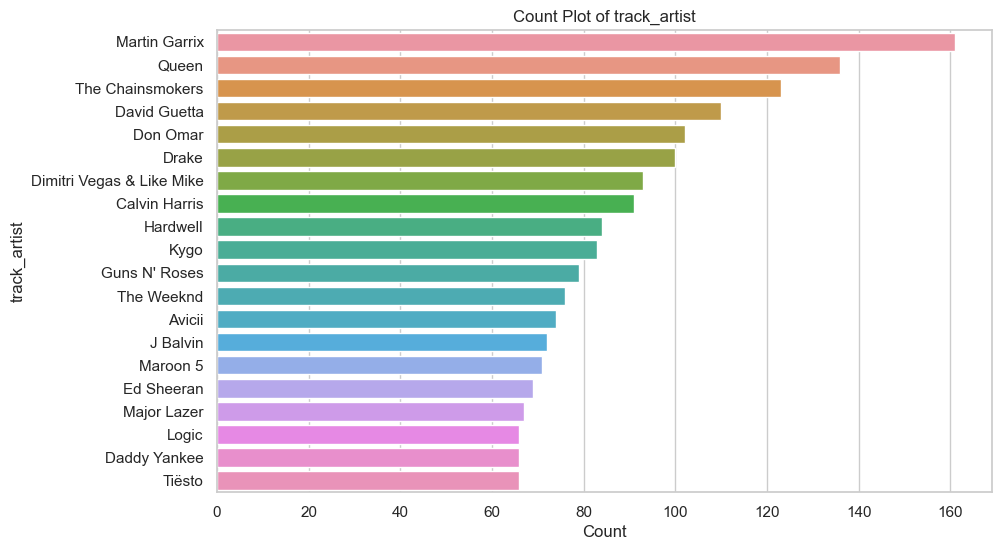

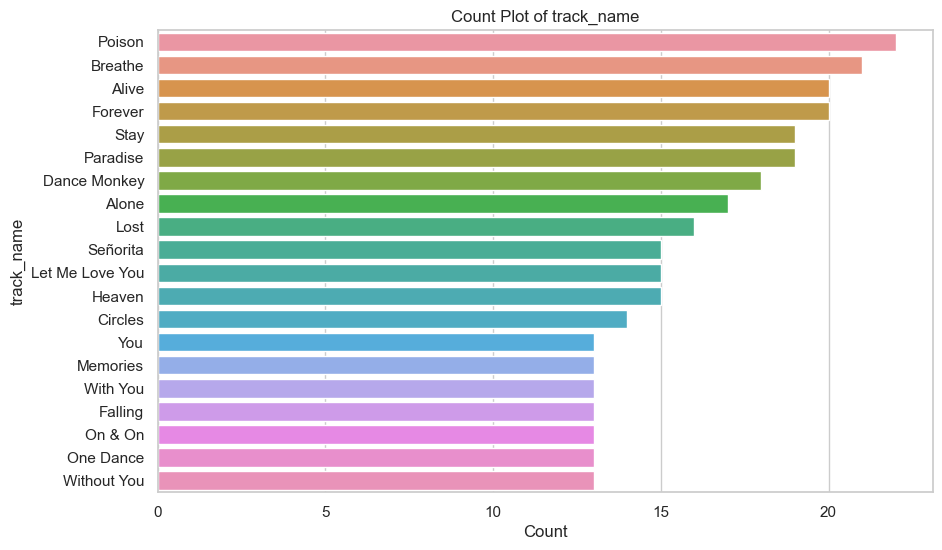

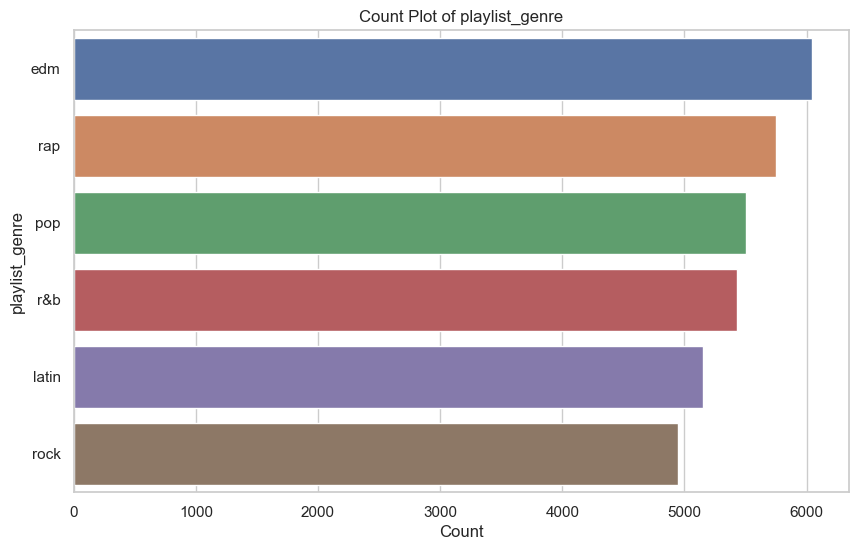

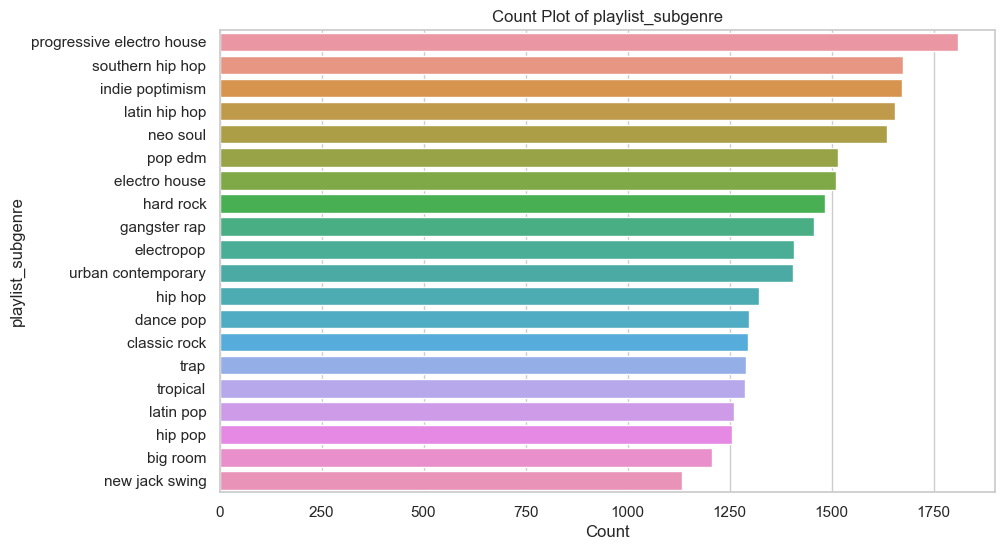

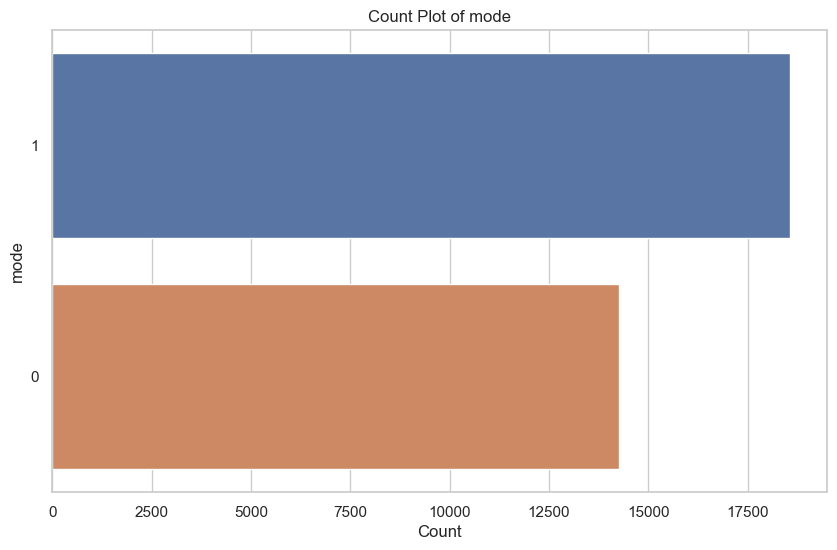

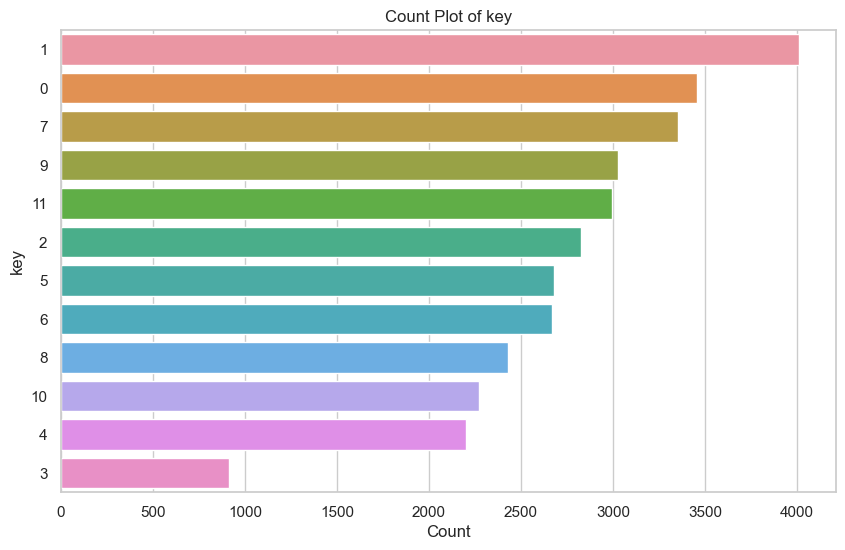

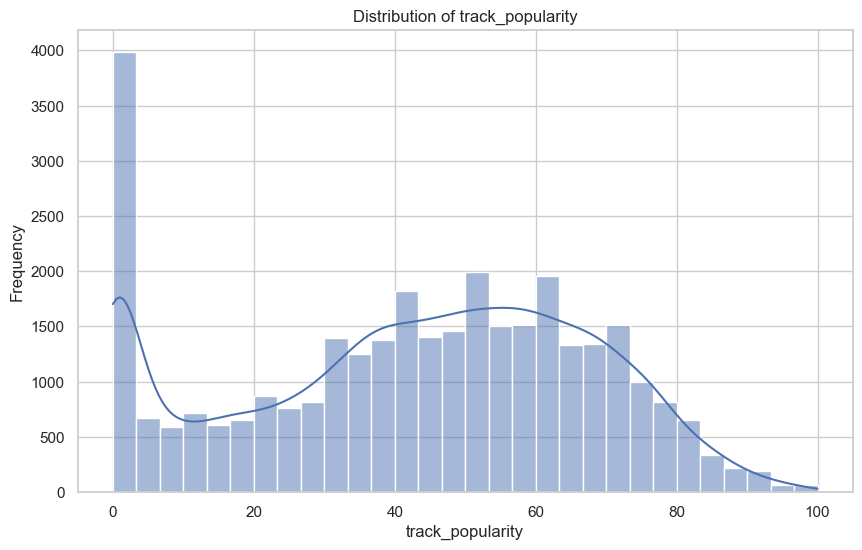

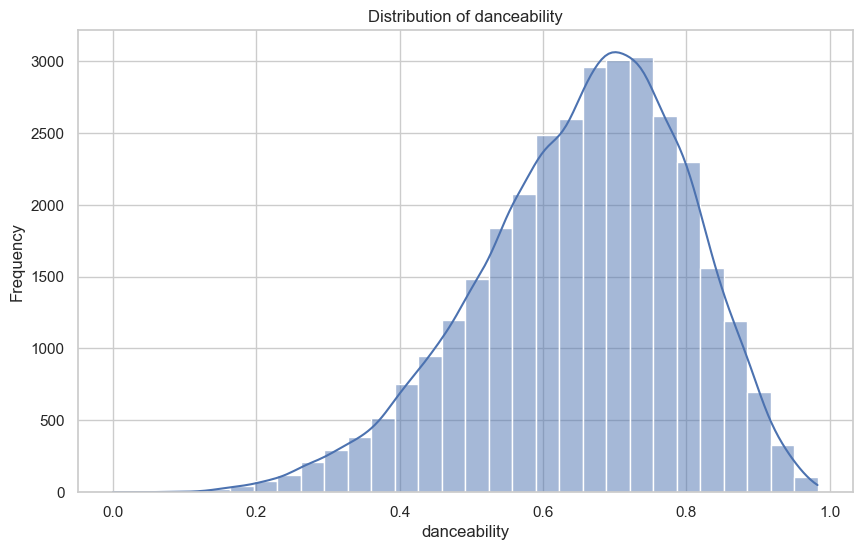

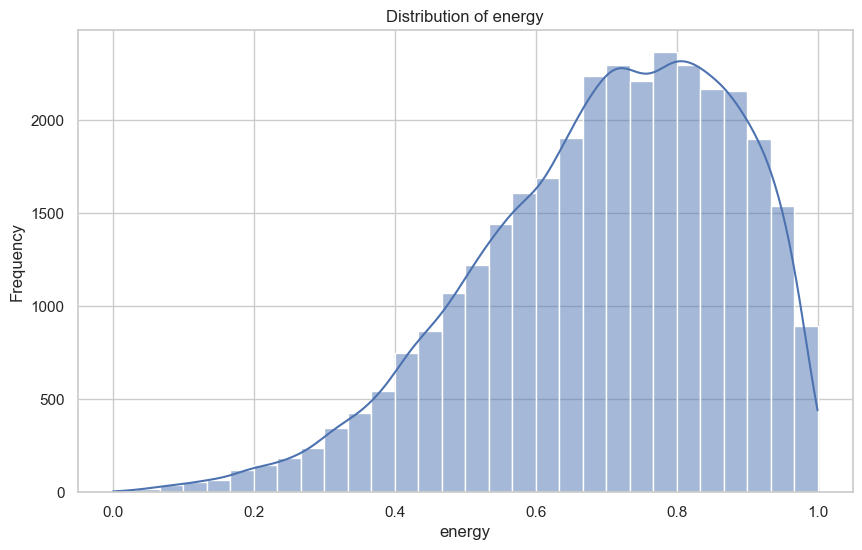

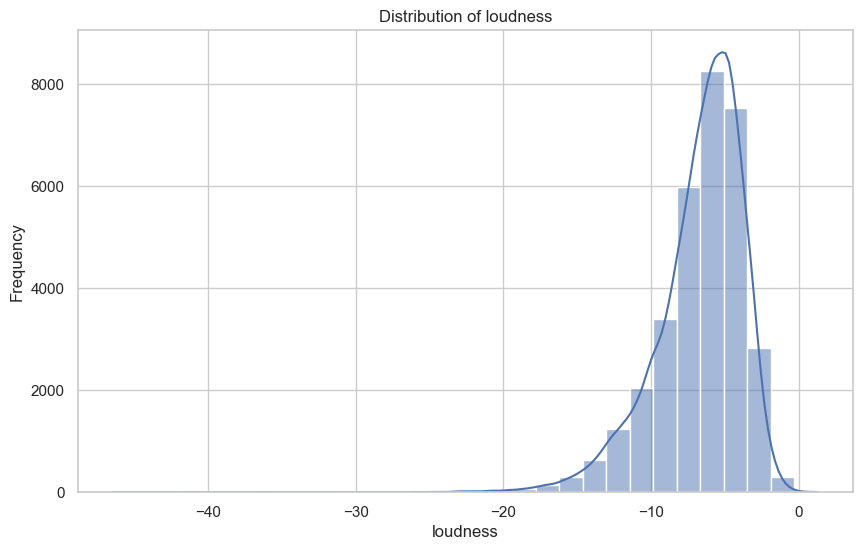

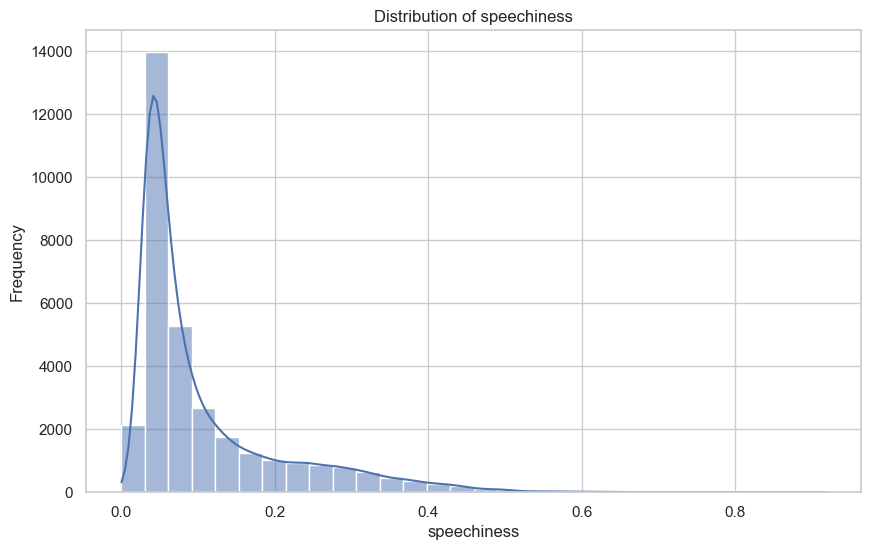

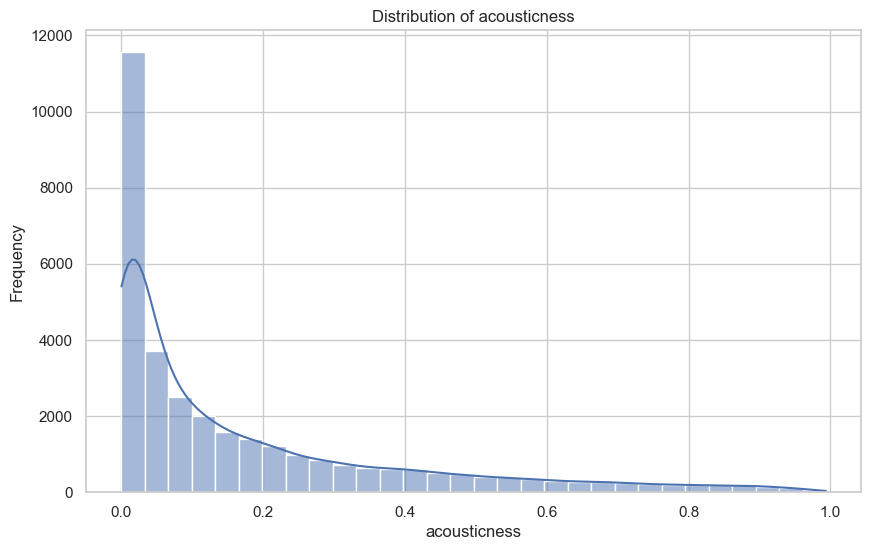

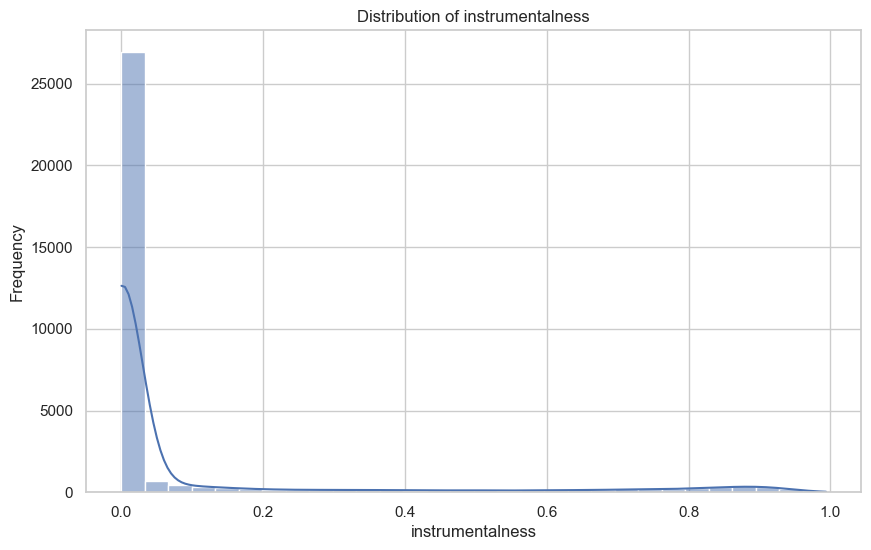

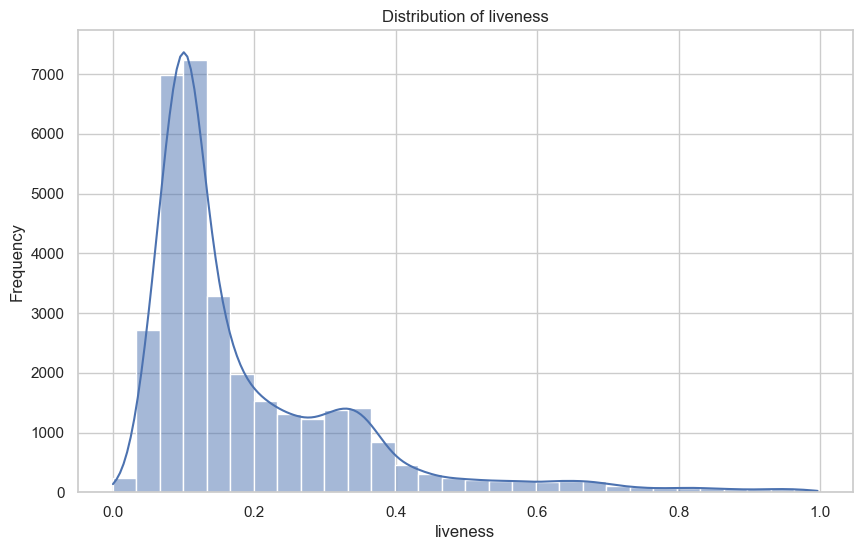

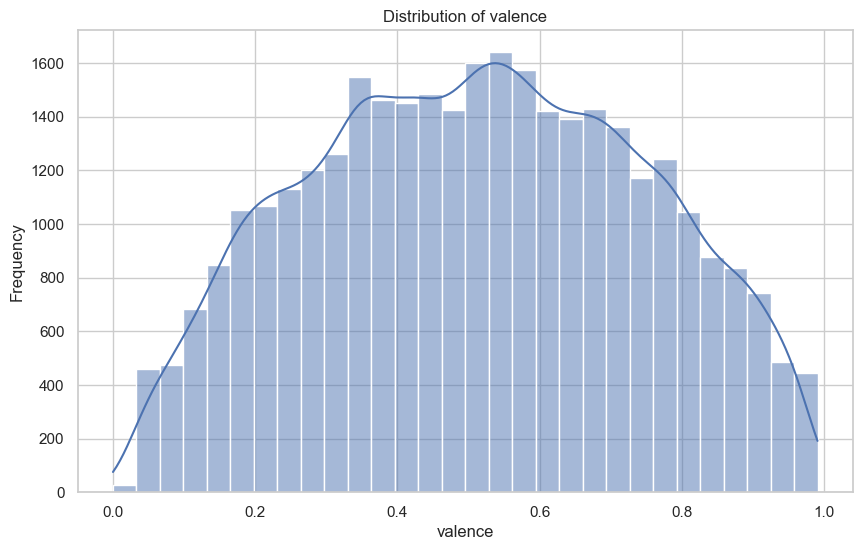

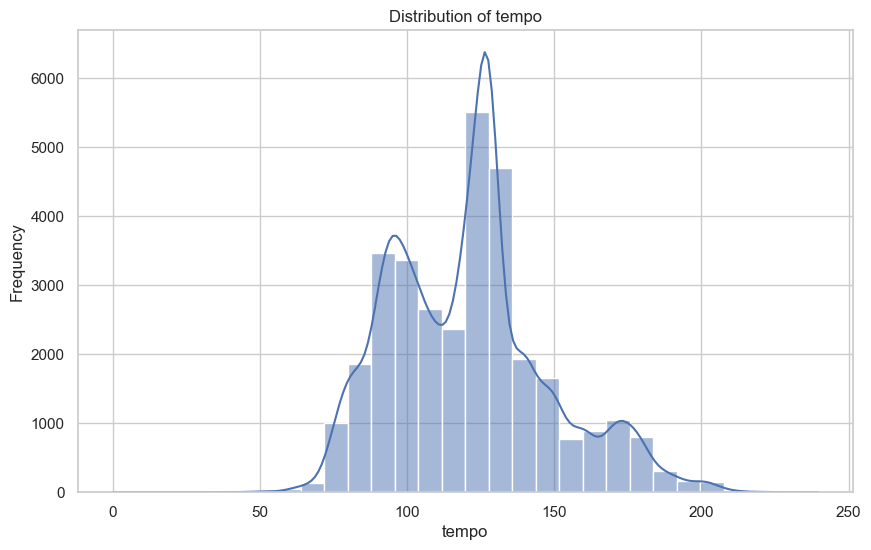

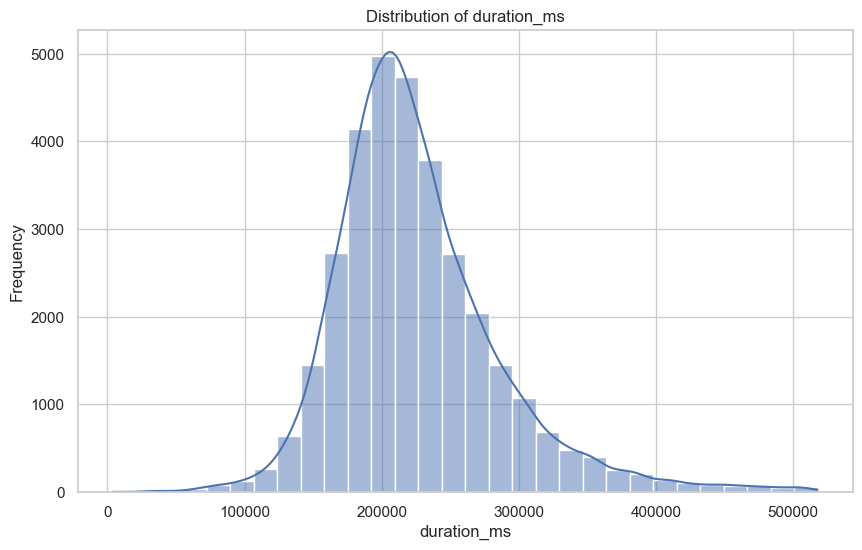

In [6]:
sns.set_theme(style="whitegrid")

# List of columns for categorical data
categorical_columns = ['track_artist', 'track_name', 'playlist_genre', 'playlist_subgenre', 'mode', 'key']
# List of columns for numerical data
numerical_columns = ['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Plotting categorical data using count plots
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=spotify_df, order=spotify_df[column].value_counts().index[:20])  # Top 20 categories
    plt.title(f'Count Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

# Plotting numerical data using histograms
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(spotify_df[column], kde=True, bins=30)  # Kernel Density Estimation for smooth distribution curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

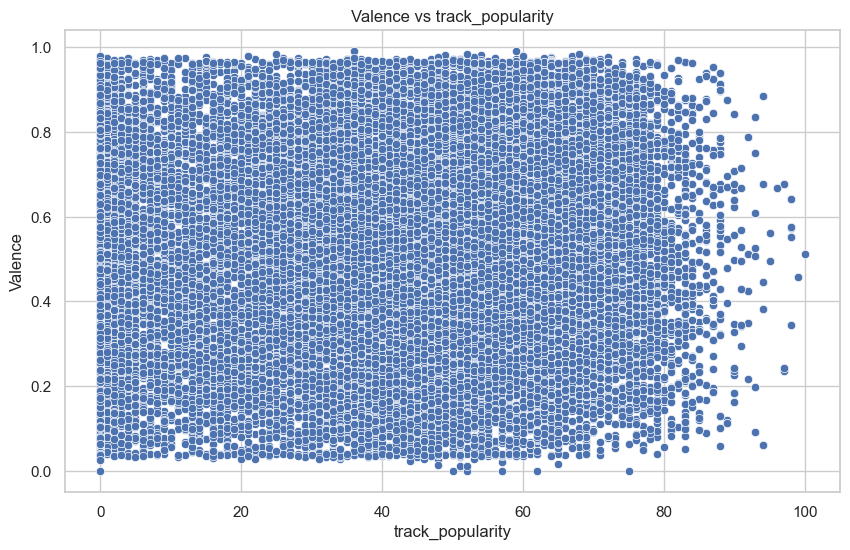

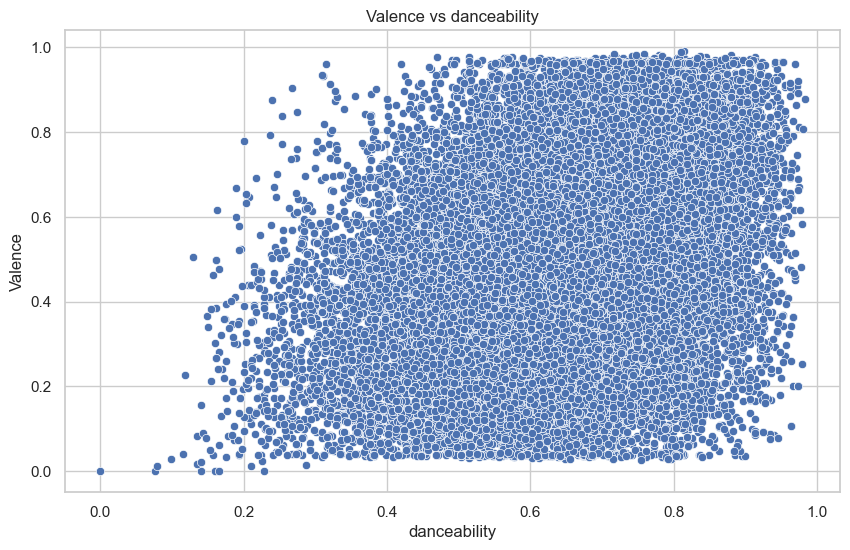

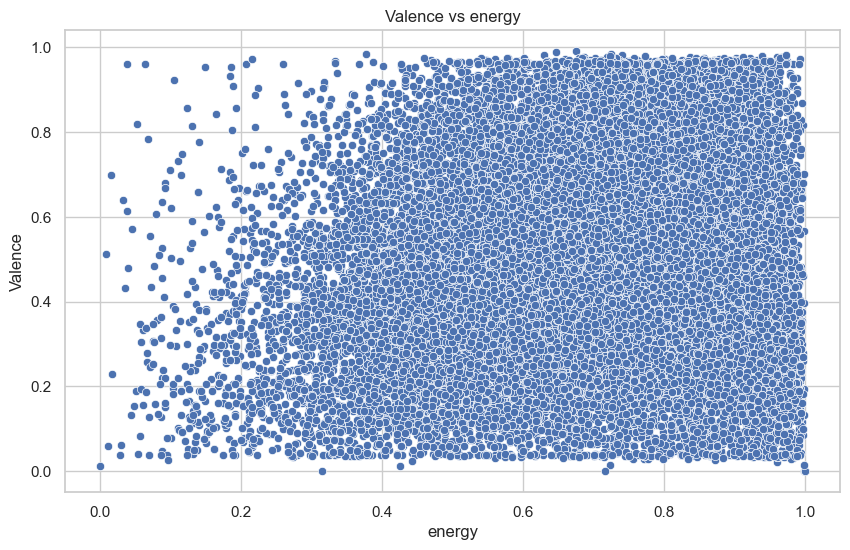

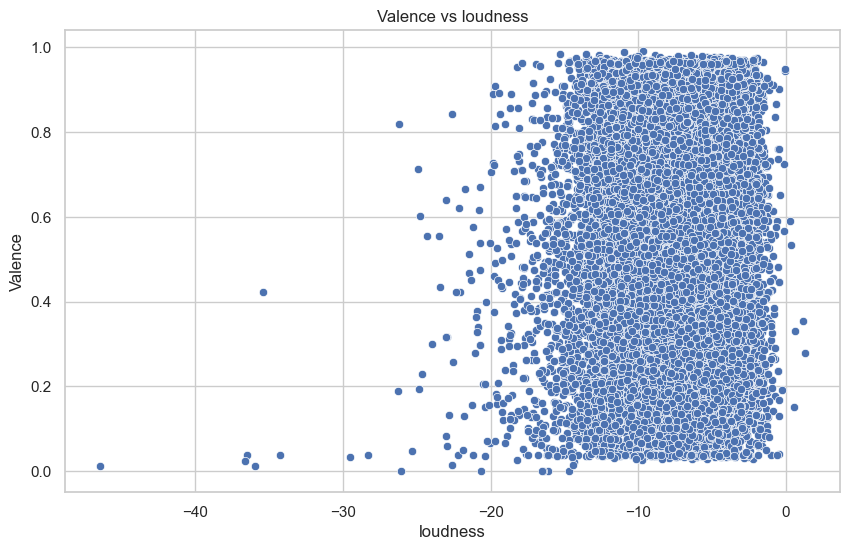

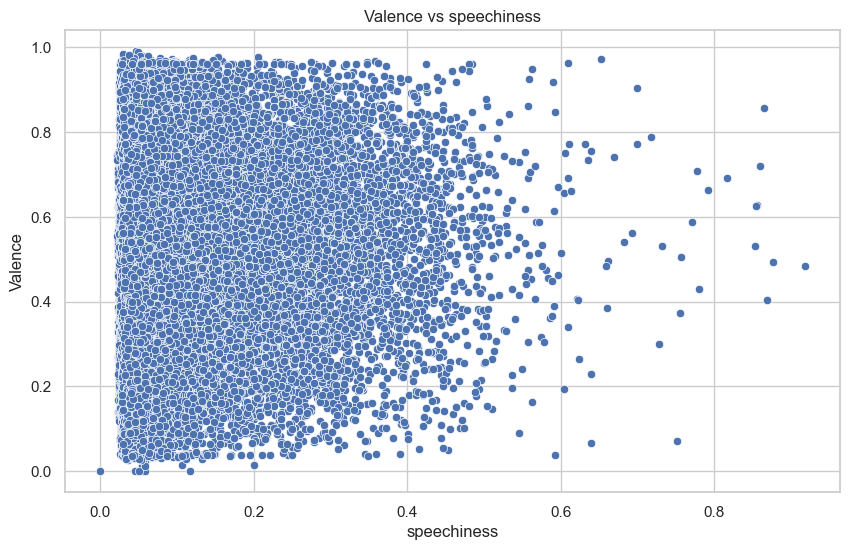

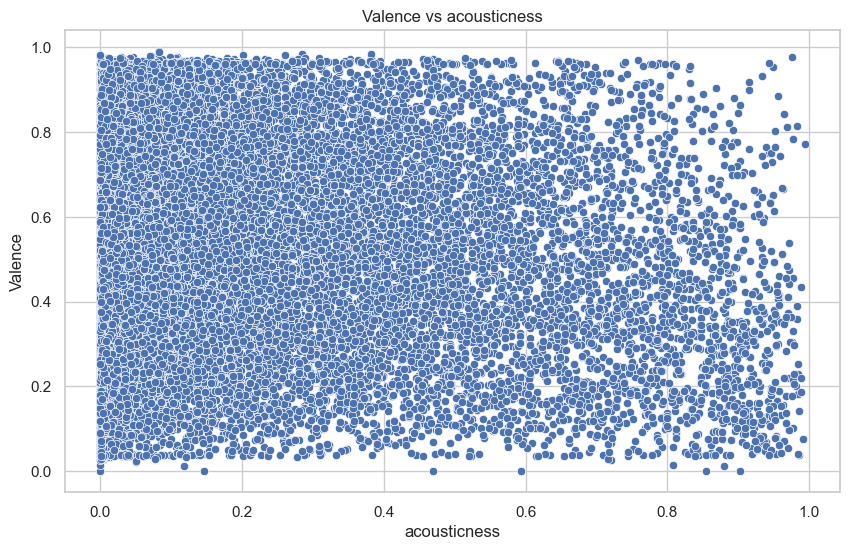

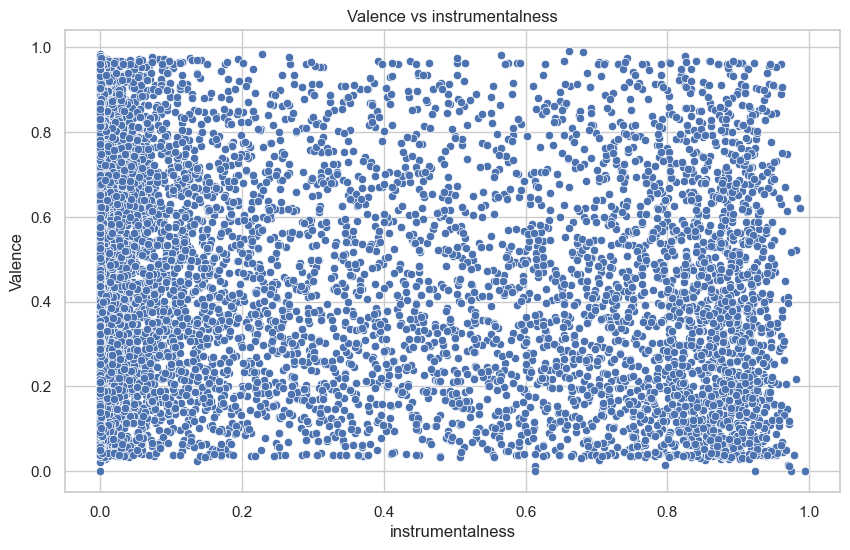

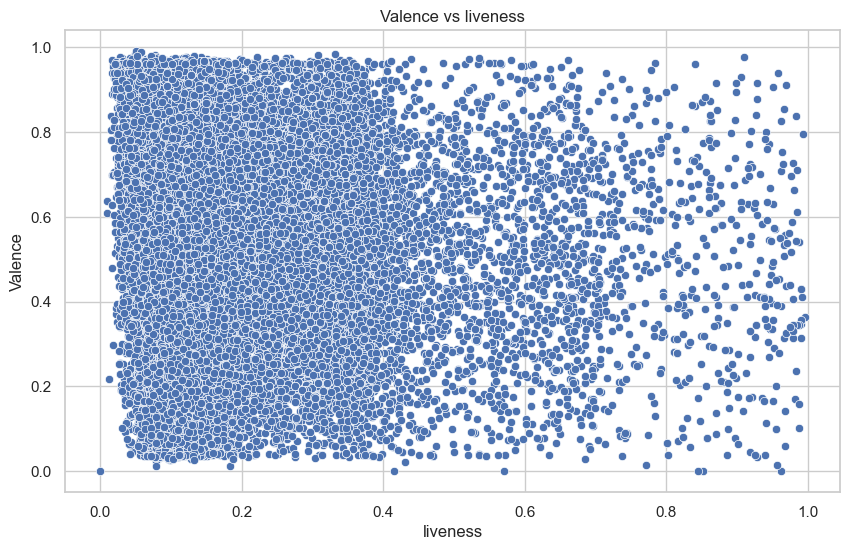

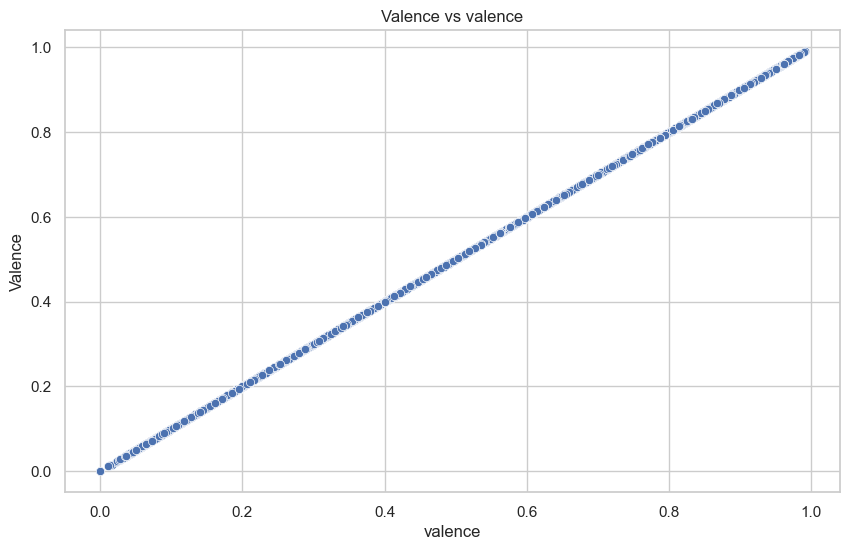

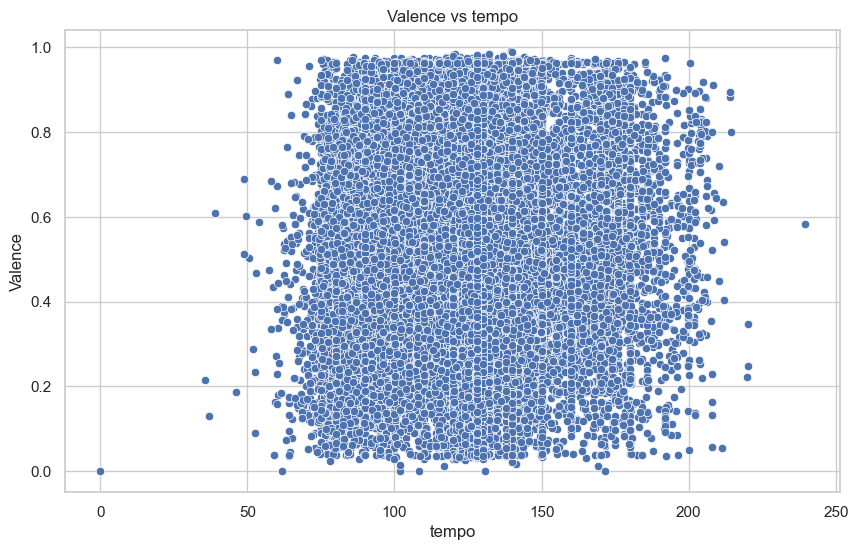

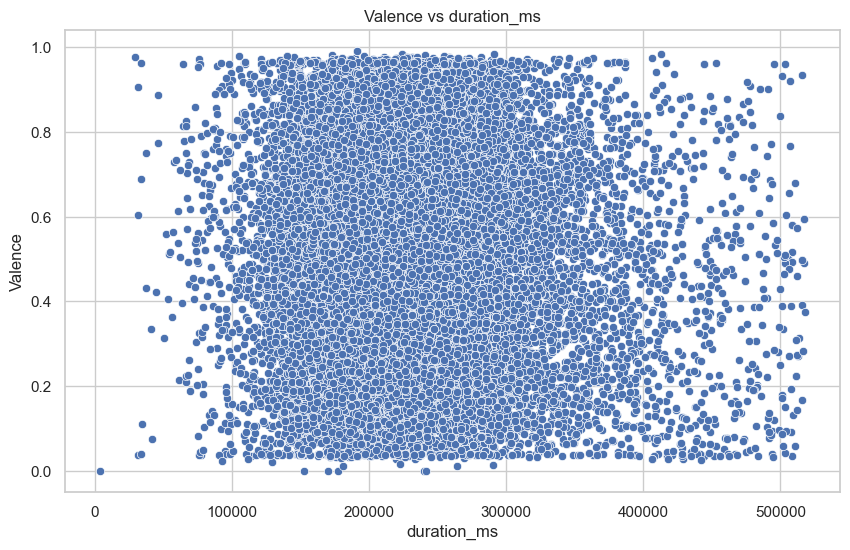

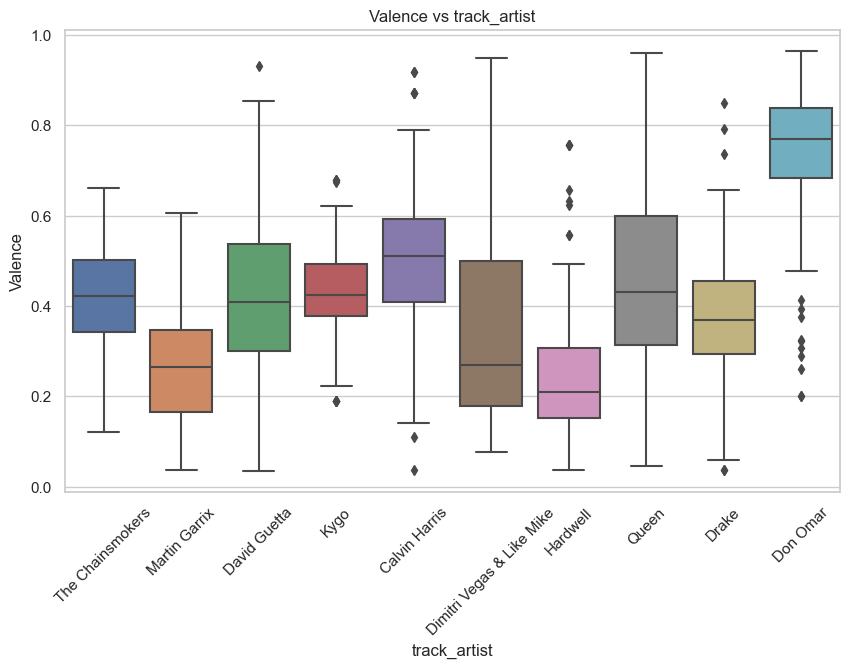

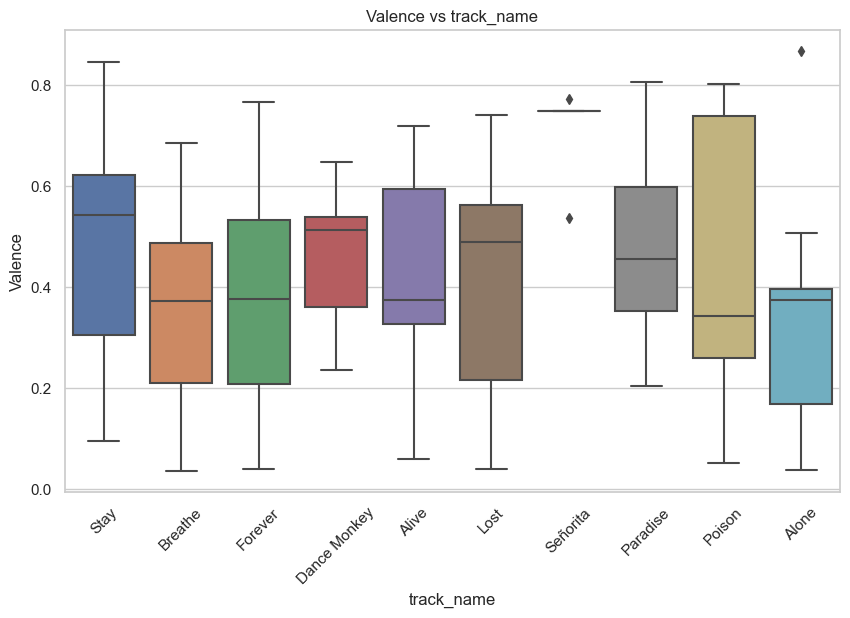

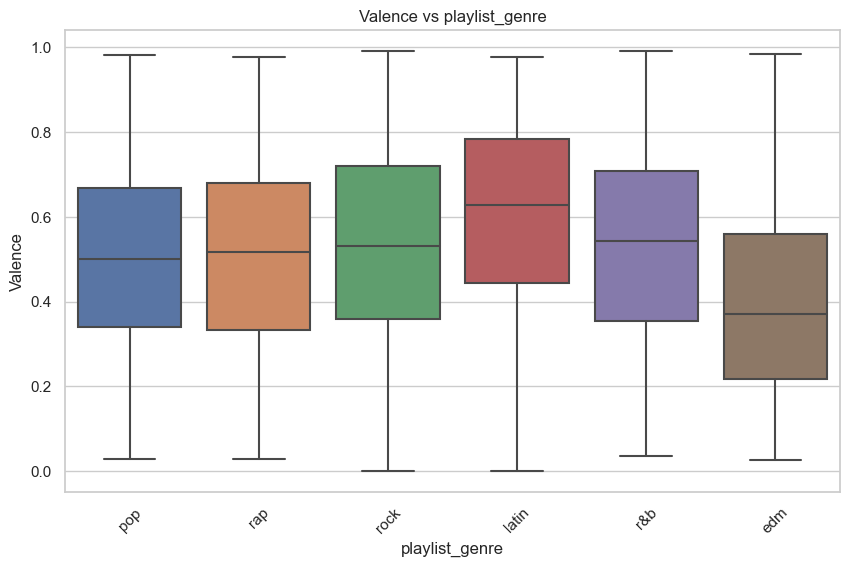

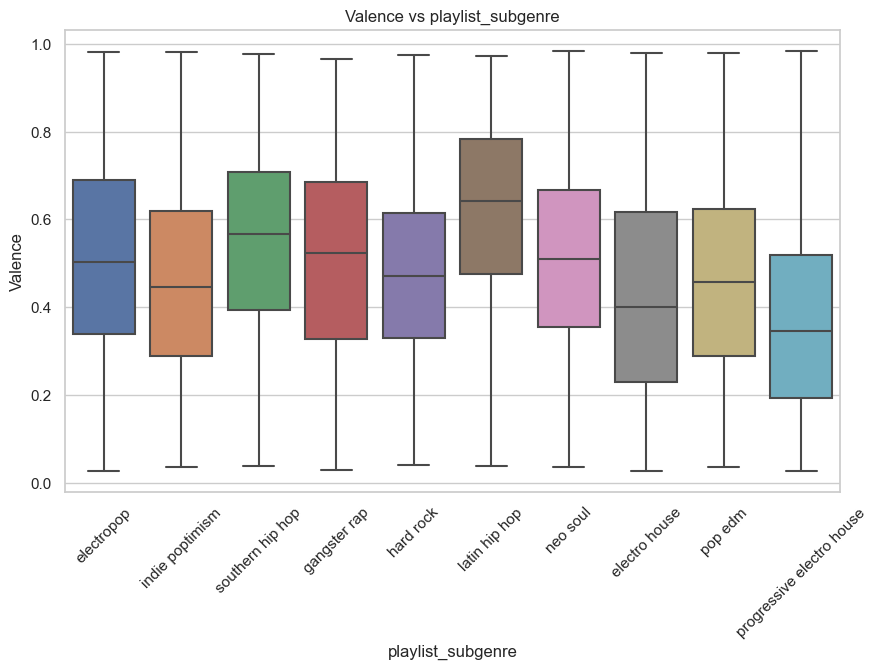

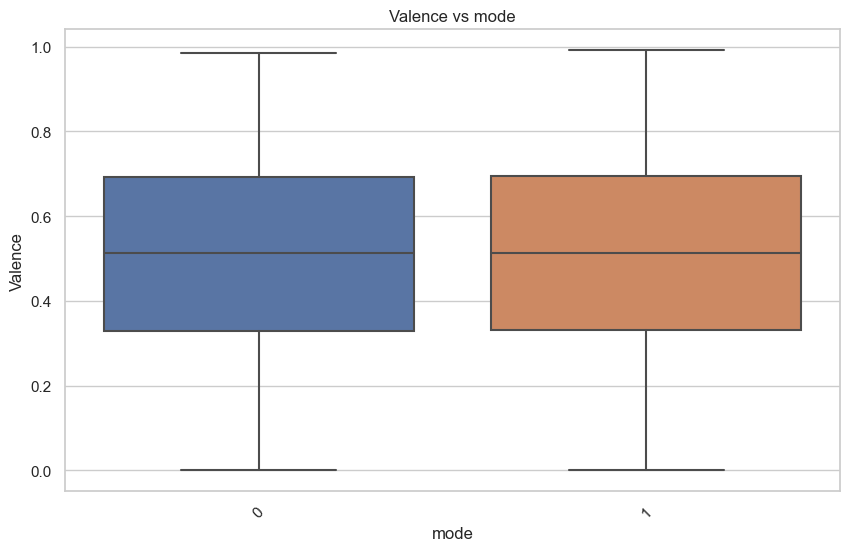

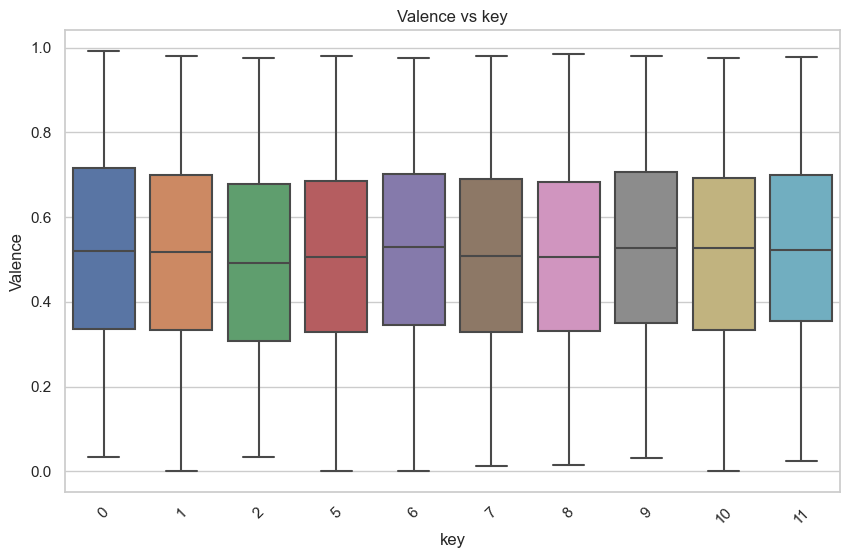

In [7]:
# Plotting numerical data against valence using scatter plots
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=spotify_df[column], y=spotify_df['valence'])
    plt.title(f'Valence vs {column}')
    plt.xlabel(column)
    plt.ylabel('Valence')
    plt.show()

# Plotting categorical data against valence using box plots
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    top_categories = spotify_df[column].value_counts().index[:10]
    filtered_df = spotify_df[spotify_df[column].isin(top_categories)]
    sns.boxplot(x=column, y='valence', data=filtered_df)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.title(f'Valence vs {column}')
    plt.xlabel(column)
    plt.ylabel('Valence')
    plt.show()

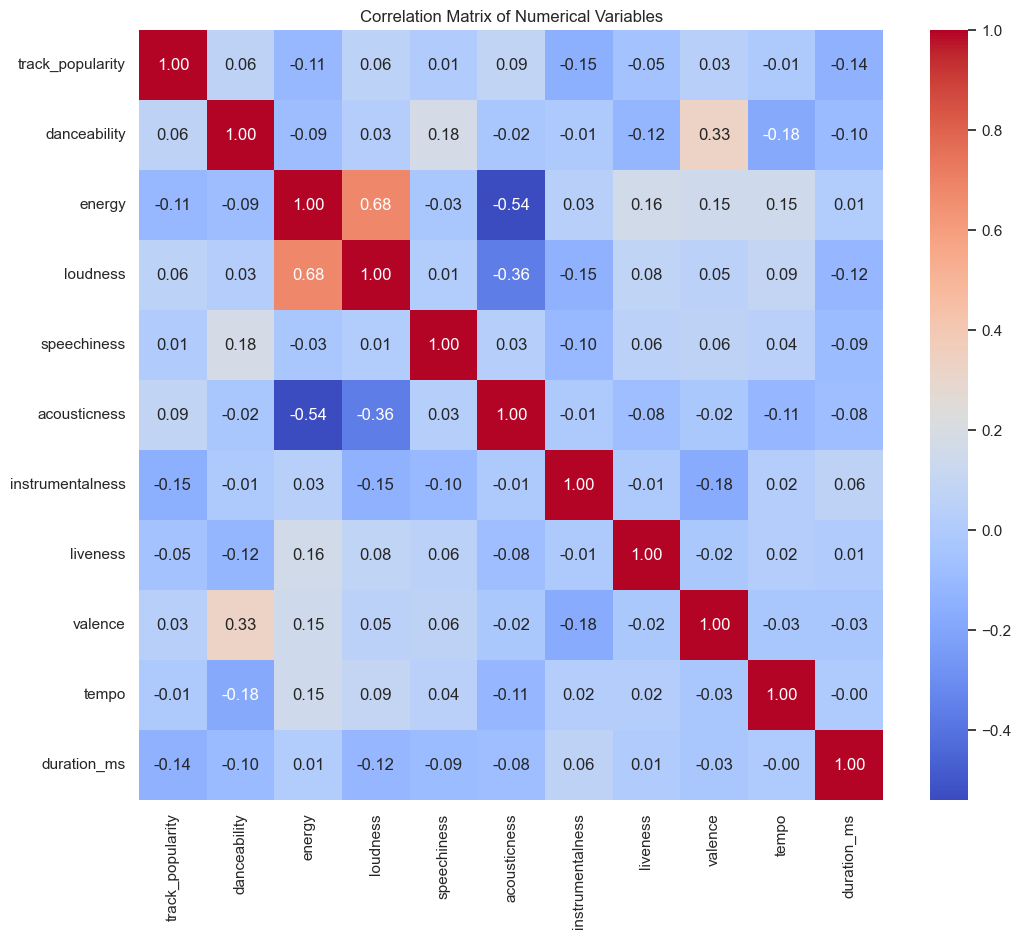

track_id             0
track_name           5
track_artist         5
track_popularity     0
track_album_id       0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64
                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id playlist_genre playlist_subgenre  danceability  \
8151   717UG2du6utF

In [8]:
numerical_df = spotify_df[numerical_columns]
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

null_counts = spotify_df.isnull().sum()
print(null_counts)
null_data = spotify_df[spotify_df.isnull().any(axis=1)]
print(null_data)

In [9]:
import statsmodels.api as sm
import pandas as pd
categorical_columns = ['track_artist', 'playlist_genre', 'playlist_subgenre', 'mode', 'key']

df_model = pd.get_dummies(spotify_df, columns=categorical_columns, drop_first=True)
df_model.drop("track_name", axis= 'columns', inplace= True)
df_model.drop("track_id", axis= 'columns', inplace= True)
df_model.drop("track_album_id", axis= 'columns', inplace= True)

print(df_model.head(20))

    track_popularity  danceability  energy  loudness  speechiness  \
0                 66         0.748   0.916    -2.634       0.0583   
1                 67         0.726   0.815    -4.969       0.0373   
2                 70         0.675   0.931    -3.432       0.0742   
3                 60         0.718   0.930    -3.778       0.1020   
4                 69         0.650   0.833    -4.672       0.0359   
5                 67         0.675   0.919    -5.385       0.1270   
6                 62         0.449   0.856    -4.788       0.0623   
7                 69         0.542   0.903    -2.419       0.0434   
8                 68         0.594   0.935    -3.562       0.0565   
9                 67         0.642   0.818    -4.552       0.0320   
10                58         0.679   0.923    -6.500       0.1810   
11                67         0.437   0.774    -4.918       0.0554   
12                67         0.744   0.726    -4.675       0.0463   
13                68         0.572

In [10]:
import statsmodels.api as sm


# Function for forward selection
def forward_selection(data, response):
    # Initialize variables for forward selection
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    
    # Perform forward selection
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            score = sm.OLS.from_formula(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    
    # Fit final model with selected features
    formula = "{} ~ {}".format(response, ' + '.join(selected))
    model = sm.OLS.from_formula(formula, data).fit()
    return model

## Comments on data
It is being noticed that there are a lot of artists that have complicated names, a lot of categorical-nominal variables that contain too many levels and this is anticipated to cause problems during the selection of the features and the training of the model. Thus the levels will be reduced based on frequency and the names of the produced columns will be cleaned

In [11]:
categorical_columns = ['track_artist', 'playlist_genre', 'playlist_subgenre', 'mode', 'key']

for column in categorical_columns:
    # Find the top 10 categories by frequency
    top_10 = spotify_df[column].value_counts().nlargest(10).index
    # Replace categories not in the top 10 with 'Other'
    spotify_df[column] = spotify_df[column].where(spotify_df[column].isin(top_10), other='Other')
# Apply one-hot encoding
spotify_df_encoded = pd.get_dummies(spotify_df, columns=categorical_columns, drop_first=True)

# Function to clean column names
def clean_column_names(df):
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('(', '').replace(')', '').replace(',', '_').replace('.', '_').replace('+', 'plus') for col in df.columns]
    return df

print(spotify_df_encoded.columns)
# Clean the column names in the encoded DataFrame
spotify_df_encoded = clean_column_names(spotify_df_encoded)
print(spotify_df_encoded.columns)

Index(['track_id', 'track_name', 'track_popularity', 'track_album_id',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'track_artist_David Guetta', 'track_artist_Dimitri Vegas & Like Mike',
       'track_artist_Don Omar', 'track_artist_Drake', 'track_artist_Hardwell',
       'track_artist_Kygo', 'track_artist_Martin Garrix', 'track_artist_Other',
       'track_artist_Queen', 'track_artist_The Chainsmokers',
       'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b',
       'playlist_genre_rap', 'playlist_genre_rock',
       'playlist_subgenre_electro house', 'playlist_subgenre_electropop',
       'playlist_subgenre_gangster rap', 'playlist_subgenre_hard rock',
       'playlist_subgenre_indie poptimism', 'playlist_subgenre_latin hip hop',
       'playlist_subgenre_neo soul', 'playlist_subgenre_pop edm',
       'playlist_subgenre_progressive electro house',
       '

## After encoding

After encoding the variables it is pretty clear that encoding all columns, is significantly increasing the complexity of the model, thus another approach will be followed.

In [12]:
# Separate features and target variable
numeric_df = spotify_df_encoded.select_dtypes(include=['int', 'int64', 'float', 'float64'])
numeric_selected = ['energy', 'track_', '_id']  # Add your keywords or substrings here
# Select columns where any criteria match
selected_columns = [col for col in spotify_df_encoded.columns if any(criterion in col for criterion in numeric_selected)]
new_df = spotify_df_encoded[selected_columns]


X = numeric_df.drop('valence', axis=1)
y = numeric_df['valence']

# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Initialize and fit the Lasso model
lasso = Lasso(alpha=0.01, max_iter=10000)  # You may need to adjust alpha based on your data
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Display coefficients
print("Lasso Coefficients:")
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso.coef_})
print(coefficients[coefficients['Coefficient'] != 0])  # Only non-zero coefficients


Mean Absolute Error: 0.1771603114526449
Lasso Coefficients:
            Feature  Coefficient
1      danceability     0.071285
2            energy     0.044513
3          loudness    -0.011294
5      acousticness     0.007186
6  instrumentalness    -0.031751


In [14]:
from sklearn.linear_model import LassoCV

# Define model with cross-validation to find the best alpha
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000, random_state=42)

# Fit model
lasso_cv.fit(X_train, y_train)

# Best alpha
print("Best alpha :", lasso_cv.alpha_)

# Fit Lasso with best alpha
lasso_best = Lasso(alpha=lasso_cv.alpha_)
lasso_best.fit(X_train, y_train)
print("Best Lasso Coefficients:")
print(pd.DataFrame({"Feature": X.columns, "Coefficient": lasso_best.coef_}))


Best alpha : 0.00019111732673989242
Best Lasso Coefficients:
            Feature  Coefficient
0  track_popularity     0.004608
1      danceability     0.087872
2            energy     0.095295
3          loudness    -0.050700
4       speechiness    -0.002713
5      acousticness     0.030464
6  instrumentalness    -0.048657
7          liveness    -0.001818
8             tempo     0.005337
9       duration_ms    -0.000267


## Feature Selection
Inference requires the simplest possible model, that describes adequately the relationship between the independent variables and a dependent variable. For this reason the independent variables that are being selected are those that the intersect of both previous methods

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


# Create a linear regression model
model = LinearRegression()

selected_features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']
print(X)
X_selected = X[selected_features]

model.fit(X_train, y_train)


# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared and Mean Absolute Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)


       track_popularity  danceability  energy  loudness  speechiness  \
0                    66         0.748   0.916    -2.634       0.0583   
1                    67         0.726   0.815    -4.969       0.0373   
2                    70         0.675   0.931    -3.432       0.0742   
3                    60         0.718   0.930    -3.778       0.1020   
4                    69         0.650   0.833    -4.672       0.0359   
...                 ...           ...     ...       ...          ...   
32828                42         0.428   0.922    -1.814       0.0936   
32829                20         0.522   0.786    -4.462       0.0420   
32830                14         0.529   0.821    -4.899       0.0481   
32831                15         0.626   0.888    -3.361       0.1090   
32832                27         0.603   0.884    -4.571       0.0385   

       acousticness  instrumentalness  liveness    tempo  duration_ms  
0          0.102000          0.000000    0.0653  122.036       

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

selected_features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']
spotify_df['key'] = spotify_df['key'].astype(str)


def add_encode_fit_evaluate(nominal_col, X, y, base_features):

    # Combine the nominal column with the existing numeric features
    X_combined = pd.concat([X[base_features], spotify_df[[nominal_col]]], axis=1)
    
    # One-hot encode the nominal column
    column_transformer = ColumnTransformer(
        [('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'), [nominal_col])],
        remainder='passthrough'
    )
    
    # Transform the combined DataFrame
    X_encoded = column_transformer.fit_transform(X_combined)

    # Split the transformed data into training and testing sets
    X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_encoded, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_encoded)

    # Calculate R-squared and Mean Absolute Error
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Output the performance metrics
    print(f"Performance after adding and encoding '{nominal_col}':")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}\n")

    return r2, mae

# Test manually which variables contain valuable information
add_encode_fit_evaluate('track_artist', X, y, selected_features)

final_features = ['track_artist','danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'playlist_genre', 'playlist_subgenre']


Performance after adding and encoding 'track_artist':
R-squared: 0.2200
Mean Absolute Error: 0.1714



## Final feature selection
After assessing the impact that each categorical nominal variable has to the R-squared and mean absolute error, the final features were selected. The function that was created allowed to manually check how much the information that the new categorical variable was useful in terms of mae and R-squared. For the first task, the goal is to create a model that describes adequately the relationship between the independent variables and the valence. Thus, the model is not anticipated to have a great predicting ability, so far the scores that the previous models have achieved are not great, but it is something that was expected, since the goal was to find which independent variables describe better the model.



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Select columns specified in final_features
X_selected = spotify_df[final_features].copy()

# Convert object columns to strings
object_cols = ['track_artist', 'playlist_genre', 'playlist_subgenre']
X_selected[object_cols] = X_selected[object_cols].astype(str)

# Perform one-hot encoding
X_encoded = pd.get_dummies(X_selected, columns=object_cols, drop_first=True)

# Add a constant to the encoded DataFrame
X_encoded = sm.add_constant(X_encoded)

# Split the data into training and testing sets
y = spotify_df['valence']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the linear regression model using statsmodels
inference_model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(inference_model.summary())


                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     370.5
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:05:40   Log-Likelihood:                 5662.7
No. Observations:               26266   AIC:                        -1.126e+04
Df Residuals:                   26235   BIC:                        -1.101e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## Interpretation of the model
The key aspects of the summary are the following:
- Coefficients: The sign of each coefficient indicates the direction of the relationship between that feature and valence. A positive sign indicates a positive relationship, where an increase in the feature value is associated with an increase in valence. Conversely, a negative sign indicates a negative relationship.
- P-Values: The p-value for each coefficient tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) suggests that you can reject the null hypothesis and that the corresponding coefficient is likely to be a meaningful addition to the model.
- R-squared (R²): The R-squared value is a measure of how well the independent variables explain the variation in the dependent variable. In your case, an R² of 0.298 means that approximately 29.8% of the variability in valence can be explained by the model. This is a moderate amount and suggests that other factors not included in the model may also be influencing valence.
- F-statistic and its p-value: The overall F-test evaluates whether at least one of the predictors is significantly related to the outcome variable. A significant F-statistic (p-value near zero) suggests that your model is a better fit than an intercept-only model.


Based on the aforementioned aspects the interpretation of the model is the following:
- Features like danceability, energy, acousticness, playlist_genre_latin, playlist_genre_pop, playlist_genre_r&b, playlist_genre_rap, playlist_genre_rock, and playlist_subgenre_pop edm have positive coefficients with p-values indicating they are statistically significant predictors of valence. This suggests that higher values in these features are associated with a higher valence.
- Features such as loudness and instrumentalness have negative coefficients with significant p-values, suggesting that increases in these features are associated with lower valence.
- Some features like track_artist_David Guetta, track_artist_Kygo, and others are not statistically significant (p > 0.05), indicating that there isn’t enough evidence to suggest these features have a predictive relationship with valence. But these features are part of categorical variables that have levels that have are statistical significant like track_artist_Don_Omar, so they should be kept.

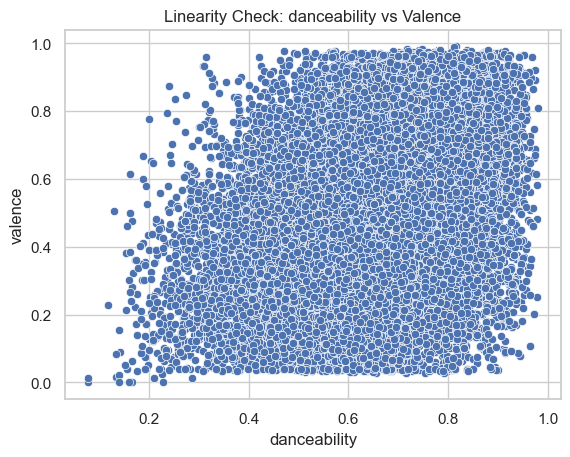

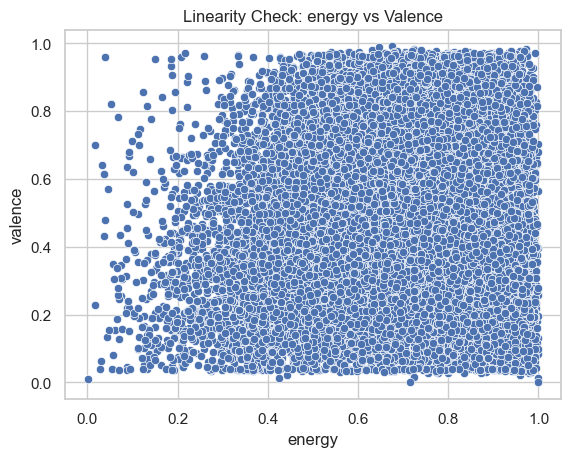

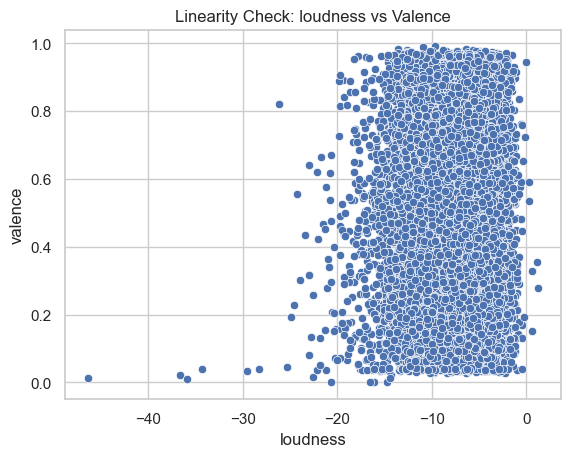

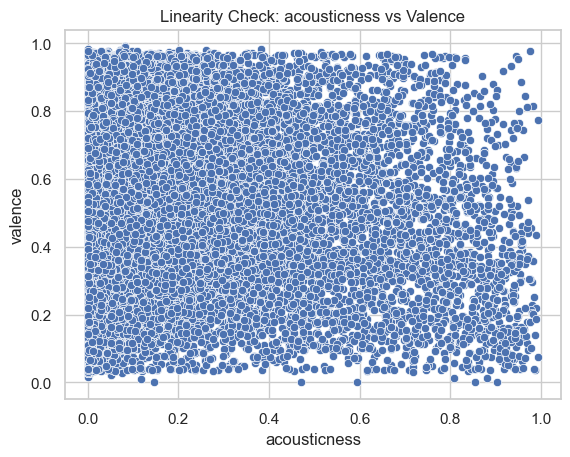

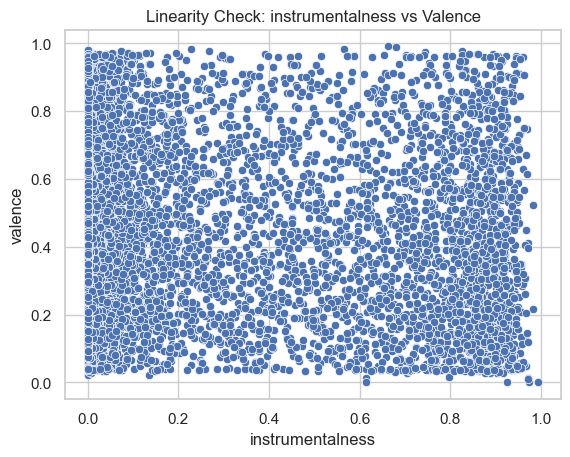

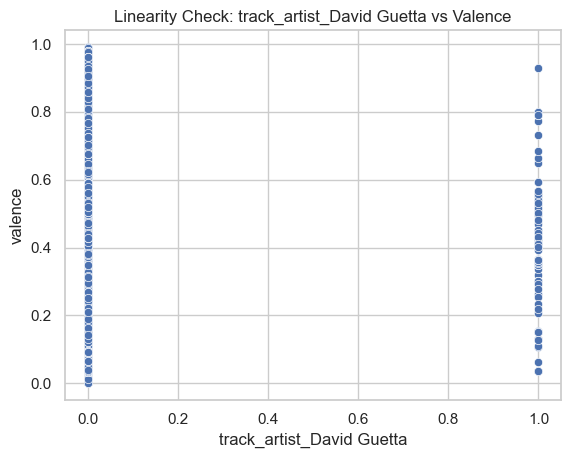

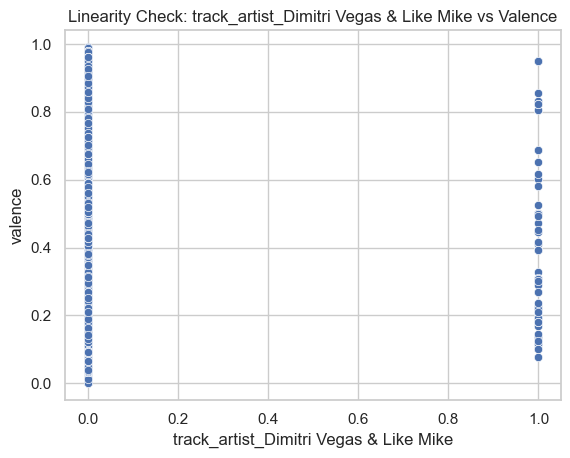

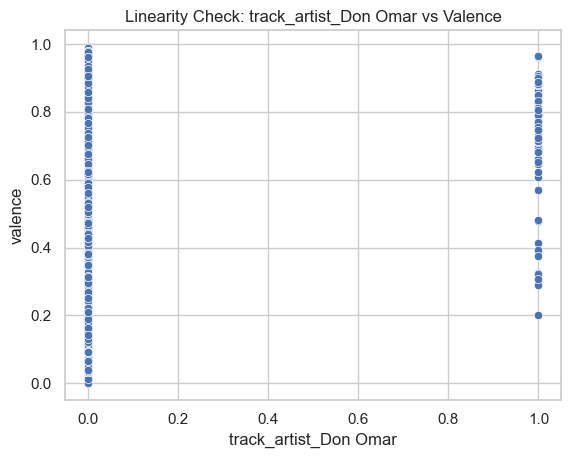

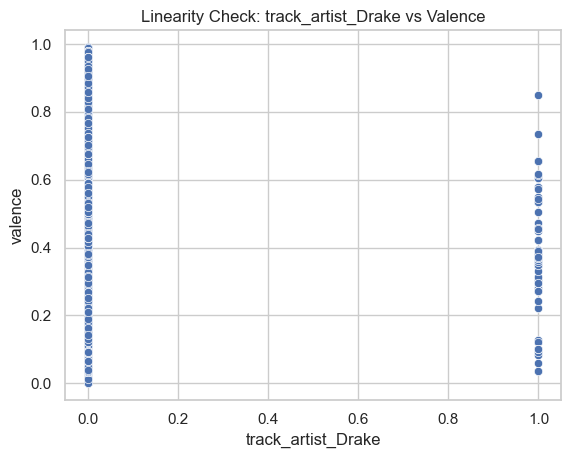

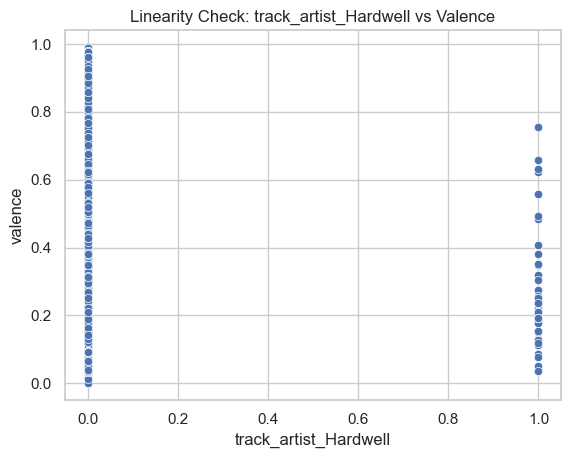

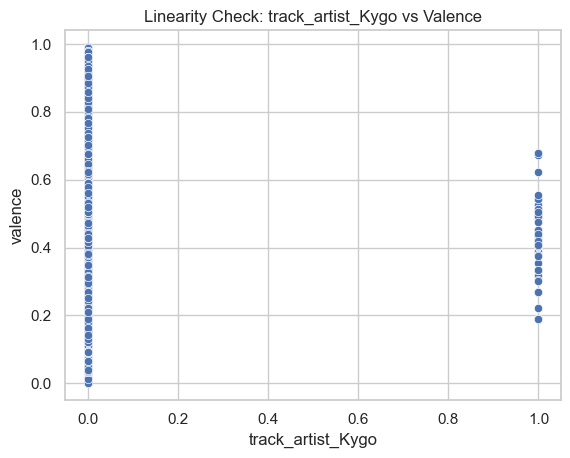

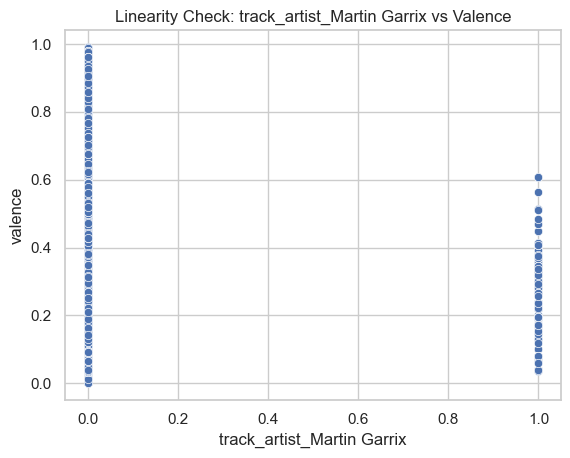

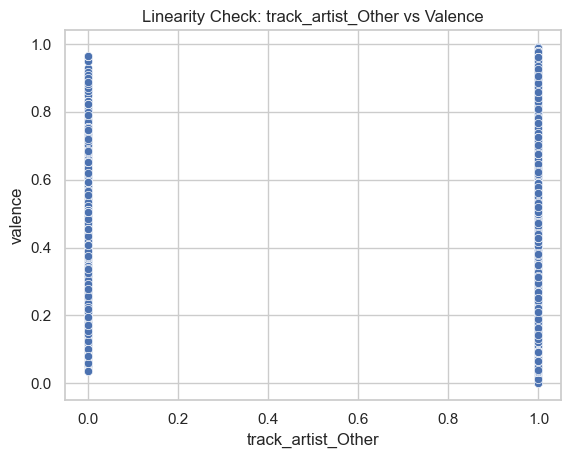

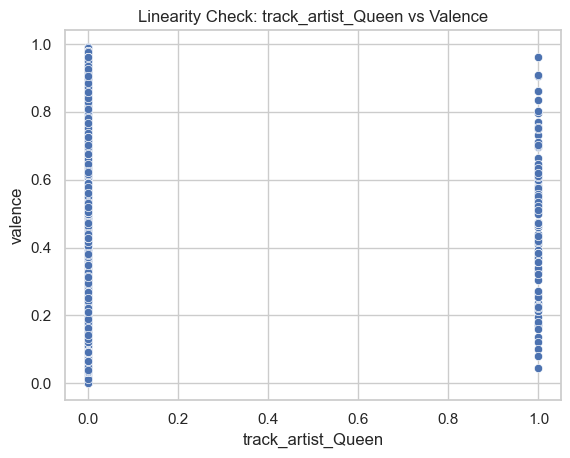

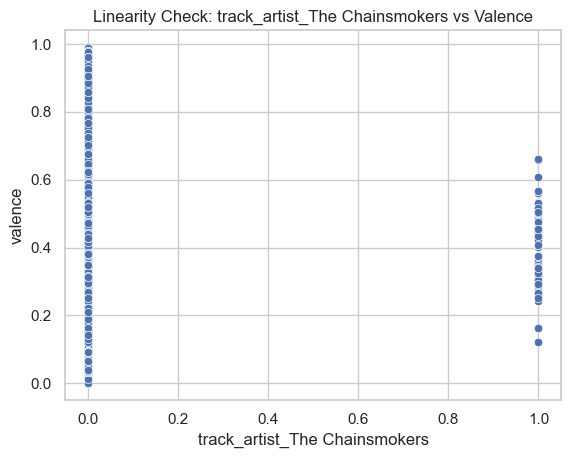

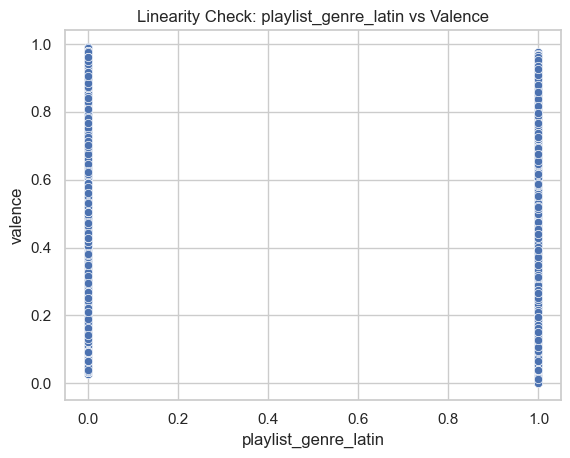

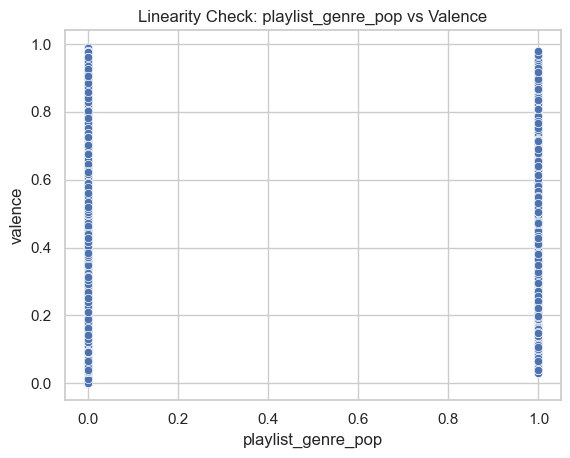

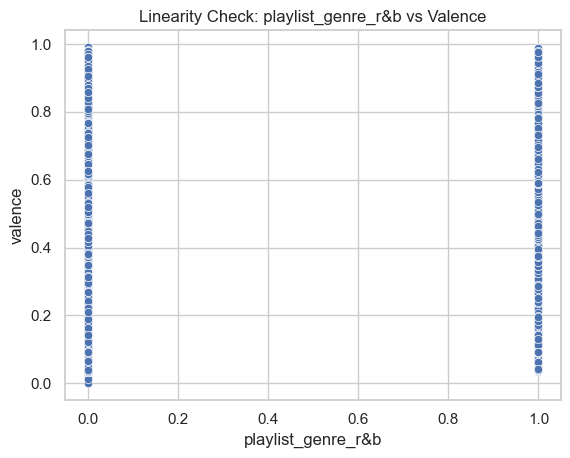

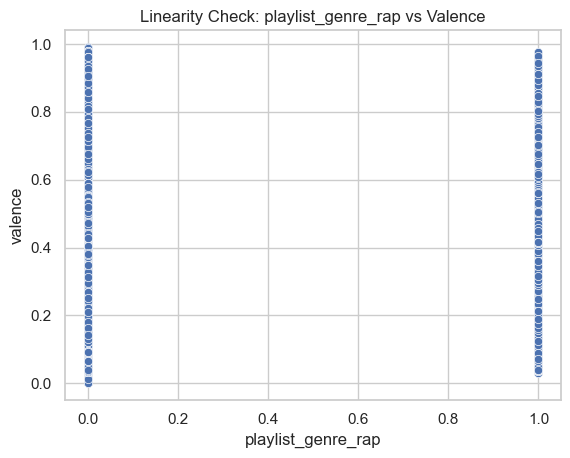

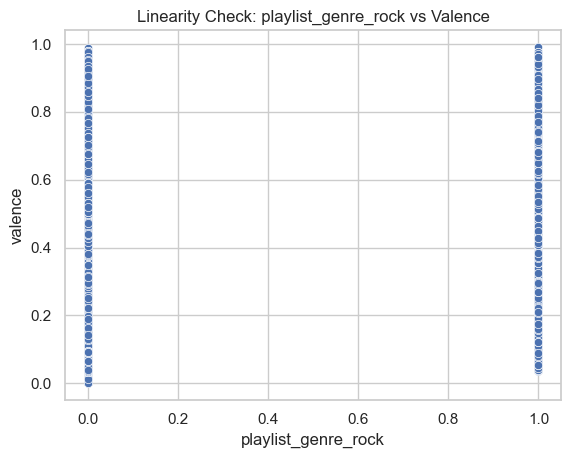

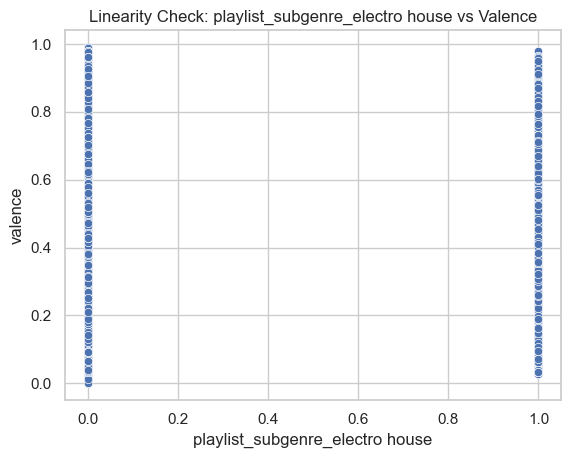

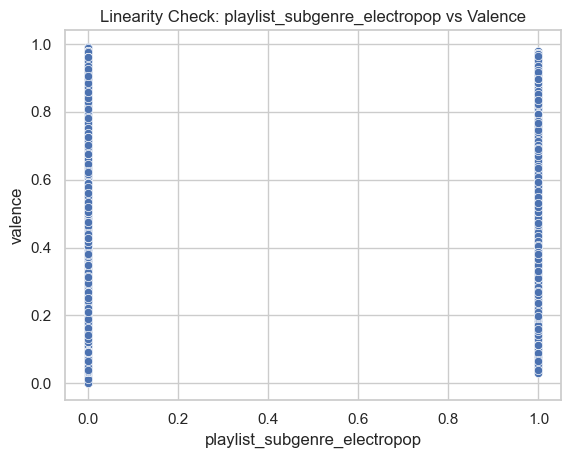

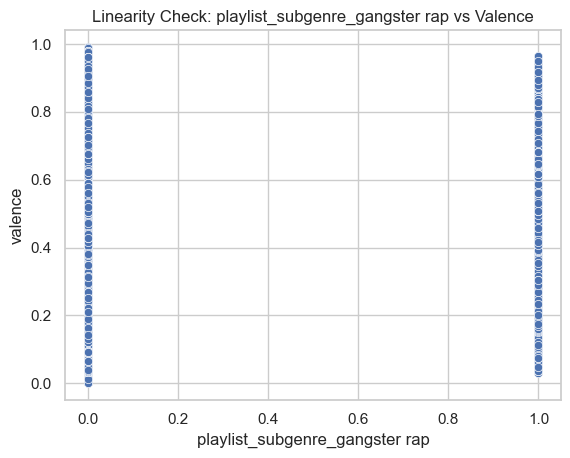

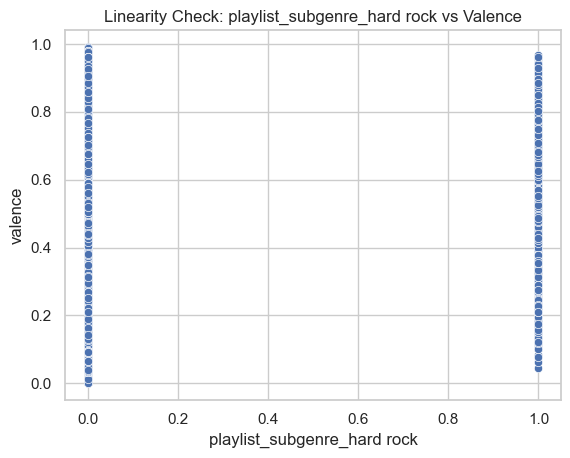

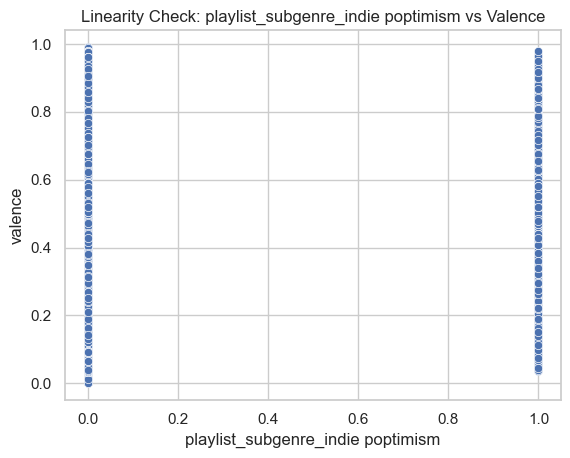

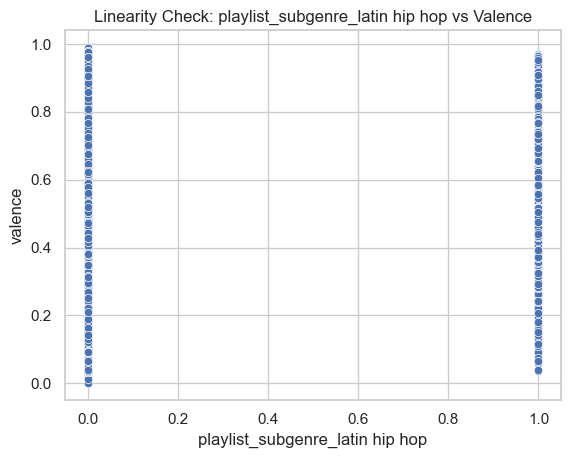

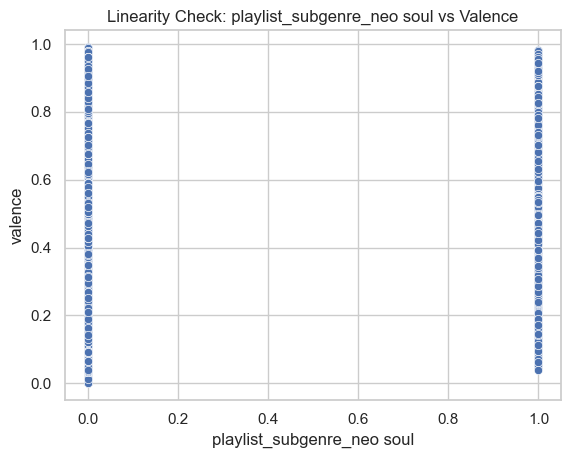

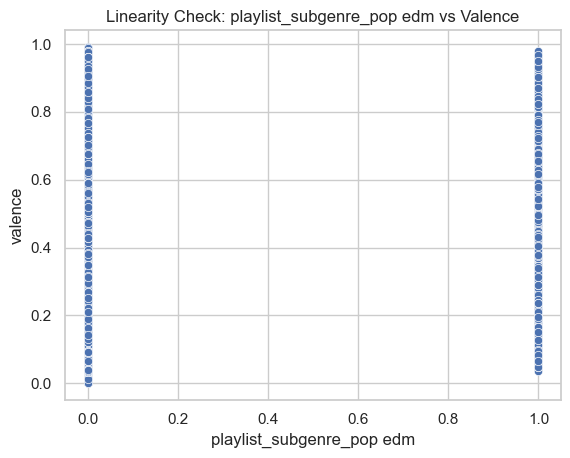

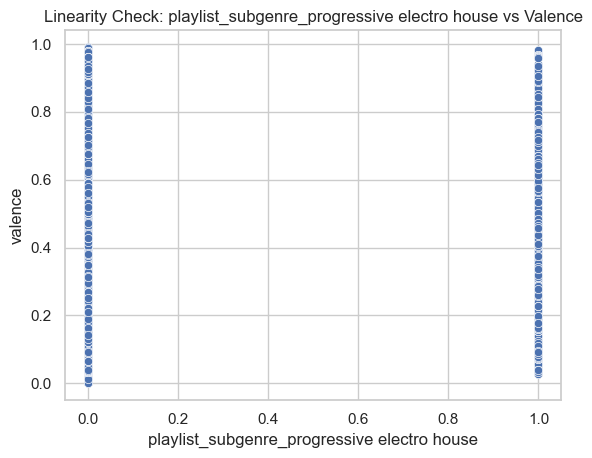

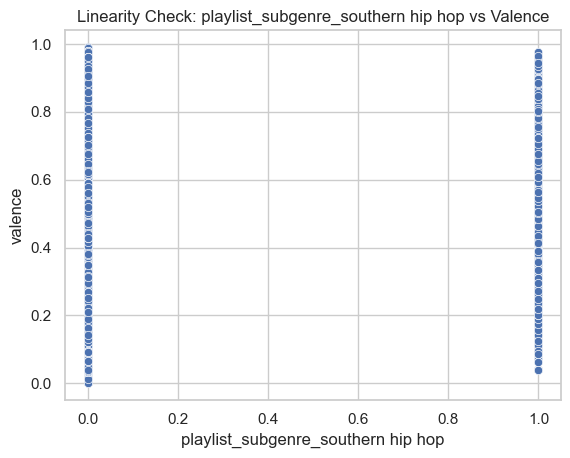

In [18]:
#Checking the assumptions of the model
import seaborn as sns
import matplotlib.pyplot as plt

# Linearity
for feature in X_train.columns:
    if feature != 'const':  # Skip the constant
        sns.scatterplot(x=X_train[feature], y=y_train)
        plt.title(f'Linearity Check: {feature} vs Valence')
        plt.show()


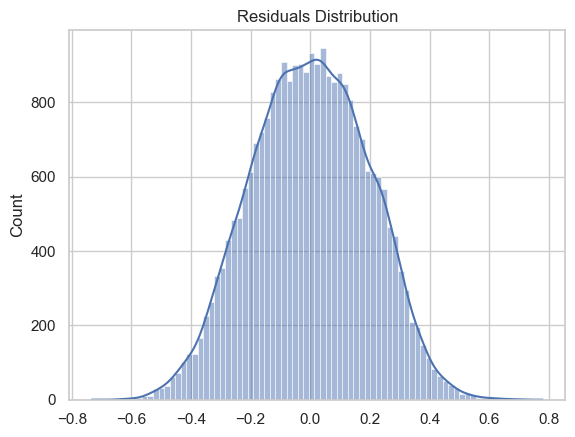

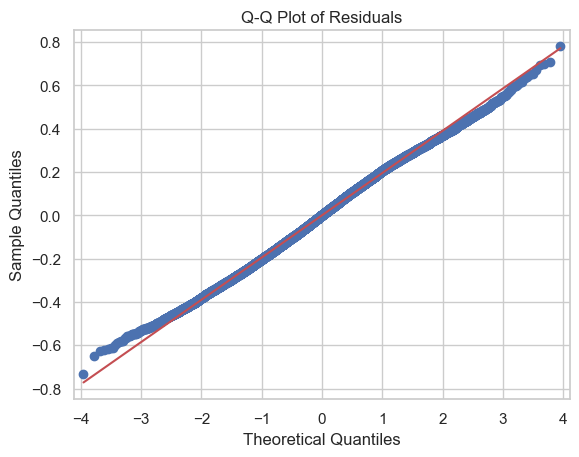

In [19]:
# Histogram of residuals
sns.histplot(inference_model.resid, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Q-Q plot
sm.qqplot(inference_model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()




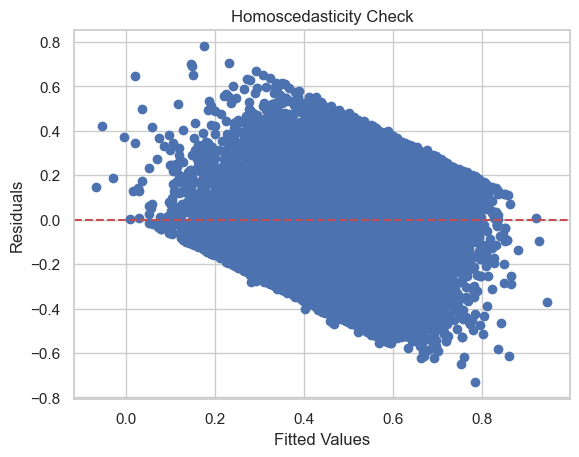

{'Lagrange Multiplier statistic': 746.4211665055395, 'p-value': 1.0004791484372893e-137, 'f-value': 25.57821641054535, 'f p-value': 6.958312256811114e-140}


In [20]:
# Plot residuals
plt.scatter(inference_model.fittedvalues, inference_model.resid)
plt.title('Homoscedasticity Check')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(inference_model.resid, inference_model.model.exog)
labels = ['Lagrange Multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


In [21]:
from statsmodels.stats.stattools import durbin_watson

# Calculate and print Durbin-Watson statistic
dw = durbin_watson(inference_model.resid)
print(f'Durbin-Watson statistic: {dw}')


Durbin-Watson statistic: 2.0108194291901555


In [22]:

# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)


                                        feature         VIF
0                                         const  514.473810
1                                  danceability    1.284515
2                                        energy    2.597113
3                                      loudness    2.118360
4                                  acousticness    1.484985
5                              instrumentalness    1.246121
6                     track_artist_David Guetta    2.271876
7        track_artist_Dimitri Vegas & Like Mike    2.050252
8                         track_artist_Don Omar    2.176531
9                            track_artist_Drake    2.096434
10                        track_artist_Hardwell    1.931836
11                            track_artist_Kygo    1.989139
12                   track_artist_Martin Garrix    2.767313
13                           track_artist_Other   11.804533
14                           track_artist_Queen    2.498793
15                track_artist_The Chain

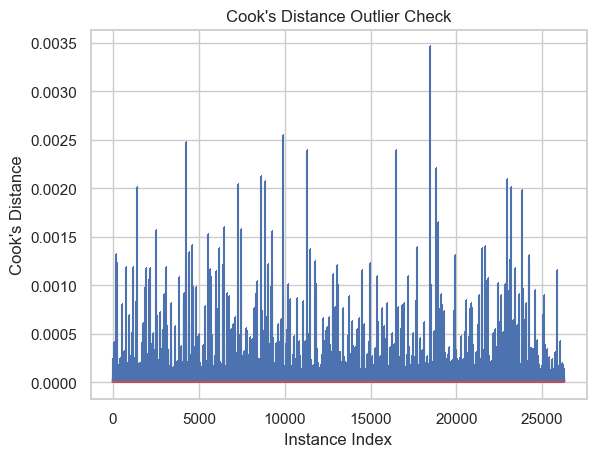

In [23]:
# Identify potential outliers using Cook's Distance
from statsmodels.stats.outliers_influence import OLSInfluence

test = OLSInfluence(inference_model)
influence = test.cooks_distance[0]

plt.stem(influence, markerfmt=",")
plt.title('Cook\'s Distance Outlier Check')
plt.xlabel('Instance Index')
plt.ylabel('Cook\'s Distance')
plt.show()


## Results after checking the assumptions

It seems that the main issues of the model are the multicollinearity and the outliers. To decrease mutlicollinearity, the acousticness will be dropped since, as it is seen in the correlation matrix, it is highly correlated with energy and loudness. Additionally, there seems to be an issue with heteroscedtasticity.

In [24]:
final_features_1 = ['danceability', 'energy', 'loudness', 'instrumentalness', 'playlist_genre', 'playlist_subgenre']

import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Select columns specified in final_features
X_selected = spotify_df[final_features_1].copy()

# Convert object columns to strings
object_cols = ['playlist_genre', 'playlist_subgenre']
X_selected[object_cols] = X_selected[object_cols].astype(str)

# Perform one-hot encoding
X_encoded = pd.get_dummies(X_selected, columns=object_cols, drop_first=True)

# Add a constant to the encoded DataFrame
X_encoded = sm.add_constant(X_encoded)

# Split the data into training and testing sets
y = spotify_df['valence']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the linear regression model using statsmodels
inference_model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(inference_model.summary())


                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     552.8
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:06:01   Log-Likelihood:                 5444.1
No. Observations:               26266   AIC:                        -1.085e+04
Df Residuals:                   26246   BIC:                        -1.068e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [25]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)


                                        feature         VIF
0                                         const  128.791458
1                                  danceability    1.259804
2                                        energy    2.202704
3                                      loudness    2.112809
4                              instrumentalness    1.240871
5                          playlist_genre_latin    5.189827
6                            playlist_genre_pop    5.950648
7                            playlist_genre_r&b    5.550924
8                            playlist_genre_rap    6.211301
9                           playlist_genre_rock    5.114810
10              playlist_subgenre_electro house    2.182771
11                 playlist_subgenre_electropop    1.504804
12               playlist_subgenre_gangster rap    1.511657
13                  playlist_subgenre_hard rock    1.402602
14            playlist_subgenre_indie poptimism    1.610248
15              playlist_subgenre_latin 

## Comments after fixing multicollinearity
It is clear that the model is describing adequately the data, but since the amount of data is enormous, a lot outliers and influence points are included in the dataset, causing different problems. Thus the Cook Distance technique will be used to remove some of the outliers and examine them, more carefully.

In [26]:
import numpy as np

influence = inference_model.get_influence()

# Cook's distance
(c, p) = influence.cooks_distance
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Set a strict (4 times stricter than the default) threshold for identifying outliers
n = X_train.shape[0]
k = X_train.shape[1]
threshold = 2 / (n - k - 1)

# Identify indices of potential outliers
outliers_indices = np.where(c > threshold)[0]

# Create the outliers DataFrame
outliers_df = X_train.iloc[outliers_indices, :]

# Remove outliers from the original DataFrame
cleaned_df = X_train.drop(index=outliers_indices)
cleaned_y = y_train.drop(index=outliers_indices)

# Verifying the removal of outliers
print(f"Identified {len(outliers_indices)} outliers.")
print("First few rows of outliers_df:")
print(outliers_df.head())
print(cleaned_df)

Identified 4024 outliers.
First few rows of outliers_df:
    const  danceability  energy  loudness  instrumentalness  \
4     1.0         0.877   0.665    -6.116          0.000035   
5     1.0         0.740   0.494   -12.662          0.862000   
25    1.0         0.908   0.901    -5.093          0.000002   
28    1.0         0.616   0.600    -8.196          0.966000   
41    1.0         0.735   0.686    -7.562          0.871000   

    playlist_genre_latin  playlist_genre_pop  playlist_genre_r&b  \
4                      0                   0                   0   
5                      0                   0                   0   
25                     0                   0                   1   
28                     0                   1                   0   
41                     0                   1                   0   

    playlist_genre_rap  playlist_genre_rock  playlist_subgenre_electro house  \
4                    1                    0                                

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     1064.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:06:03   Log-Likelihood:                -8998.7
No. Observations:               22242   AIC:                         1.804e+04
Df Residuals:                   22222   BIC:                         1.820e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

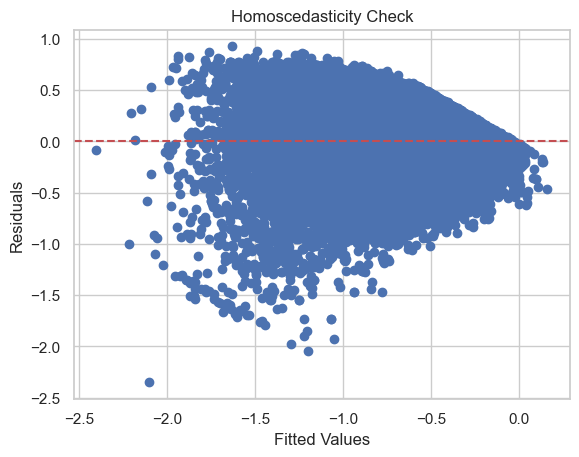

In [27]:
import numpy as np
cleaned_y = np.log(cleaned_y)

# Fit the linear regression model on the cleaned data
cleaned_model = sm.OLS(cleaned_y, cleaned_df).fit()

# Display the summary of the new model
print(cleaned_model.summary())

# Improve homoscedasticity
plt.scatter(cleaned_model.fittedvalues, cleaned_model.resid)
plt.title('Homoscedasticity Check')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


## Interpretation of the last model
- R-squared: The R-squared value is 0.369, which indicates that approximately 36.9% of the variability in valence can be explained by the model's features. This is a modest amount, suggesting that while the model has explanatory power, there are other factors not captured by the model that also affect valence.
- Adjusted R-squared: This is very similar to R-squared but takes into account the number of predictors in the model. It's also 0.368, which is almost the same as the R-squared value, indicating that the model isn't being penalized significantly for having unnecessary predictors.
- F-statistic: The F-statistic value is high, and the associated probability is virtually zero, indicating that the overall regression is statistically significant. In other words, the model provides a better fit than an intercept-only model.
- Coefficients: The coefficients for the predictors show the expected change in valence for a one-unit increase in the predictor, holding all other predictors constant. Significant predictors (where P<|t| is less than 0.05) such as danceability, energy, and playlist_genre_rock have positive coefficients, indicating a positive association with valence.

The features were scaled in order to interpret the impact that each predictor has on valence. A strong predictor will have both a large absolute t-value and a highly significant p-value (typically below 0.05). Based on your output, the strongest predictors appear to be:

- danceability: With a coefficient of 0.6914 and a p-value of 0.000, it has the highest t-value, indicating a very strong and significant positive effect on valence.
- energy: With a coefficient of 0.5330 and a p-value of 0.000, it also strongly positively influences valence.
- playlist_genre_rock: It has a coefficient of 0.3383 and a p-value of 0.000, which suggests a strong and significant positive association with valence.

The predictors danceability, energy, and playlist_genre_rock not only have statistically significant coefficients but their coefficients are also relatively large compared to other variables, making them strong predictors of valence in this model.

# Prediction of valence
The main goal of the prediction in this task is to minimise the mean absolute error, thus the feature selection needs to be modified and then the approach of the model fitting will also be different.

In [28]:
predict_df = pd.read_csv('spotify_songs.csv')
print(predict_df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [29]:
print(predict_df['track_artist'].nunique())
print(predict_df['playlist_genre'].nunique())
print(predict_df['playlist_subgenre'].nunique())
print(predict_df['track_album_name'].nunique())
print(predict_df['playlist_id'].nunique())

10692
6
24
19743
471


In [30]:
from sklearn.preprocessing import StandardScaler

columns_to_drop = ['track_id','track_album_id','track_artist', 'track_album_name', 'playlist_id','playlist_name', 'track_album_release_date', 'track_name']

# Drop the columns
model_df = predict_df.drop(columns=columns_to_drop, axis=1)


numeric_cols = model_df.select_dtypes(include=['float64', 'int64', 'float','int']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale only the numeric columns
model_df[numeric_cols] = scaler.fit_transform(model_df[numeric_cols])


# Check the result
print(model_df.head())

   track_popularity playlist_genre playlist_subgenre  danceability    energy  \
0          0.941531            pop         dance pop      0.642049  1.201614   
1          0.981557            pop         dance pop      0.490412  0.643317   
2          1.101635            pop         dance pop      0.138889  1.284529   
3          0.701374            pop         dance pop      0.435271  1.279002   
4          1.061609            pop         dance pop     -0.033426  0.742815   

        key  loudness      mode  speechiness  acousticness  instrumentalness  \
0  0.173200  1.367123  0.876177    -0.481362     -0.333898         -0.377953   
1  1.557627  0.585766  0.876177    -0.688642     -0.468670         -0.359177   
2 -1.211227  1.100090 -1.141322    -0.324422     -0.436799         -0.377849   
3  0.450085  0.984309  0.876177    -0.050024     -0.667642         -0.377911   
4 -1.211227  0.685151  0.876177    -0.702460     -0.432701         -0.377953   

   liveness   valence     tempo  durat

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
# Encode categorical variables
categorical_columns = model_df.select_dtypes(include=['object', 'string']).columns
model_df = pd.get_dummies(model_df, columns=categorical_columns, drop_first=True)


model_df = clean_column_names(model_df)
# Split the data into training and testing
train_df, test_df = train_test_split(model_df, test_size=0.2, random_state=42)
y_train = train_df['valence']
y_test = test_df['valence']
X_train = train_df.drop('valence', axis=1)
X_test = test_df.drop('valence', axis=1)
print(model_df)


       track_popularity  danceability    energy       key  loudness      mode  \
0              0.941531      0.642049  1.201614  0.173200  1.367123  0.876177   
1              0.981557      0.490412  0.643317  1.557627  0.585766  0.876177   
2              1.101635      0.138889  1.284529 -1.211227  1.100090 -1.141322   
3              0.701374      0.435271  1.279002  0.450085  0.984309  0.876177   
4              1.061609     -0.033426  0.742815 -1.211227  0.685151  0.876177   
...                 ...           ...       ...       ...       ...       ...   
32828         -0.019096     -1.563583  1.234780 -0.934342  1.641519  0.876177   
32829         -0.899670     -0.915679  0.483014 -1.488113  0.755423  0.876177   
32830         -1.139827     -0.867431  0.676483  0.173200  0.609190 -1.141322   
32831         -1.099801     -0.198848  1.046839 -0.934342  1.123849  0.876177   
32832         -0.619487     -0.357378  1.024728 -0.103686  0.718948 -1.141322   

       speechiness  acousti

In [32]:
def stepwise_selection(X_train, y_train, X_test, y_test):
    included = []
    model = LinearRegression()
    best_mae = float('inf')  

    # Iterate over each column in X_train
    for column in X_train.columns:
        # Test including this column
        included_test = included + [column]
        X_train_temp = sm.add_constant(X_train[included_test])  
        model.fit(X_train_temp, y_train)

        # Calculate MAE on the testing set
        X_test_temp = sm.add_constant(X_test[included_test])  
        y_pred = model.predict(X_test_temp)
        mae = mean_absolute_error(y_test, y_pred)

        # Check if this variable improves the model
        if mae < best_mae:
            best_mae = mae
            included.append(column)  # Include this column permanently if it improves the model
            print(f"Added {column}, New MAE: {mae}")

    return included

included_variables = stepwise_selection(X_train, y_train, X_test, y_test)
print('Included Variables:', included_variables)


Added track_popularity, New MAE: 0.8470563534356278
Added danceability, New MAE: 0.7930723423280887
Added energy, New MAE: 0.776972955367279
Added key, New MAE: 0.7769162017637612
Added loudness, New MAE: 0.7688632812592932
Added mode, New MAE: 0.7683380944002245
Added acousticness, New MAE: 0.7624199118554098
Added instrumentalness, New MAE: 0.7396172134861735
Added liveness, New MAE: 0.7394134246496225
Added tempo, New MAE: 0.7392742872276964
Added playlist_genre_latin, New MAE: 0.7340819502757352
Added playlist_genre_pop, New MAE: 0.7338271164663049
Added playlist_genre_r&b, New MAE: 0.729771955311108
Added playlist_genre_rap, New MAE: 0.7297351363495153
Added playlist_genre_rock, New MAE: 0.7046291713452503
Added playlist_subgenre_big_room, New MAE: 0.7021231764677809
Added playlist_subgenre_classic_rock, New MAE: 0.7001479929430694
Added playlist_subgenre_electro_house, New MAE: 0.6998619746649307
Added playlist_subgenre_electropop, New MAE: 0.6998496009749429
Added playlist_subge

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

def stepwise_selection_dt(X_train, y_train, X_test, y_test):
    included = []
    model = DecisionTreeRegressor(random_state=42)  # Decision Tree Regressor
    best_mae = float('inf')  

    # Iterate over each column in X_train
    for column in X_train.columns:
        # Test including this column
        included_test = included + [column]
        X_train_temp = X_train[included_test]  # No need to add constant
        model.fit(X_train_temp, y_train)

        # Calculate MAE on the testing set
        X_test_temp = X_test[included_test]
        y_pred = model.predict(X_test_temp)
        mae = mean_absolute_error(y_test, y_pred)

        # Check if this variable improves the model
        if mae < best_mae:
            best_mae = mae
            included.append(column)  # Include this column permanently if it improves the model
            print(f"Added {column}, New MAE: {mae}")

    return included

included_variables = stepwise_selection_dt(X_train, y_train, X_test, y_test)
print('Included Variables:', included_variables)


Added track_popularity, New MAE: 0.8461646143776355
Added playlist_genre_latin, New MAE: 0.8307589537508641
Added playlist_genre_r&b, New MAE: 0.8254078168350722
Added playlist_genre_rap, New MAE: 0.8224159548410094
Added playlist_genre_rock, New MAE: 0.8144559882225827
Added playlist_subgenre_big_room, New MAE: 0.8098430434126349
Added playlist_subgenre_classic_rock, New MAE: 0.8082202200755807
Added playlist_subgenre_electro_house, New MAE: 0.8053504908568644
Added playlist_subgenre_electropop, New MAE: 0.8042425288020175
Added playlist_subgenre_neo_soul, New MAE: 0.8041416535271408
Added playlist_subgenre_new_jack_swing, New MAE: 0.7982096804830311
Added playlist_subgenre_post_teen_pop, New MAE: 0.7972108337807536
Added playlist_subgenre_progressive_electro_house, New MAE: 0.7964098080372803
Added playlist_subgenre_reggaeton, New MAE: 0.7948642078332654
Added playlist_subgenre_trap, New MAE: 0.7921779572030127
Added playlist_subgenre_tropical, New MAE: 0.7909167937452852
Included Va

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split

def stepwise_selection_rf(X_train, y_train, X_test, y_test):
    included = []
    model = RandomForestRegressor(random_state=42, n_estimators=100)  # Random Forest Regressor
    best_mae = float('inf')  

    # Iterate over each column in X_train
    for column in X_train.columns:
        # Test including this column
        included_test = included + [column]
        X_train_temp = X_train[included_test]
        model.fit(X_train_temp, y_train)

        # Calculate MAE on the testing set
        X_test_temp = X_test[included_test]
        y_pred = model.predict(X_test_temp)
        mae = mean_absolute_error(y_test, y_pred)

        # Check if this variable improves the model
        if mae < best_mae:
            best_mae = mae
            included.append(column)  # Include this column permanently if it improves the model
            print(f"Added {column}, New MAE: {mae}")

    return included


included_variables_rf = stepwise_selection_rf(X_train, y_train, X_test, y_test)
print('Included Variables:', included_variables_rf)


Added track_popularity, New MAE: 0.8462496784858151
Added danceability, New MAE: 0.7775225596074
Added energy, New MAE: 0.6879733425541024
Added key, New MAE: 0.6718038701289488
Added loudness, New MAE: 0.6532504063659131
Added mode, New MAE: 0.6492133008191145
Added speechiness, New MAE: 0.6328359061961586
Added acousticness, New MAE: 0.6138935339455246
Added instrumentalness, New MAE: 0.5916911617143644
Added liveness, New MAE: 0.5830040289857136
Added tempo, New MAE: 0.5634279974514963
Added duration_ms, New MAE: 0.5594634943466893
Added playlist_genre_rap, New MAE: 0.5587614278567585
Added playlist_genre_rock, New MAE: 0.5561816720345625
Added playlist_subgenre_gangster_rap, New MAE: 0.555916232053638
Included Variables: ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'playlist_genre_rap', 'playlist_genre_rock', 'playlist_subgenre_gangster_rap']


In [35]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

included_variables_2 = ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 'acousticness', 'instrumentalness',
                        'liveness', 'tempo', 'playlist_genre']

final_df = predict_df.drop(columns=columns_to_drop, axis=1)

# Select features and the target
X = final_df[included_variables_2]
y = final_df['valence']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline with preprocessing and the regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the parameter grid
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MAE found: ", grid_search.best_score_)
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, predictions)
print("Test MAE: ", test_mae)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found:  {'regressor__alpha': 0.1}
Best negative MAE found:  -0.1614503159351902
Test MAE:  0.16429499290712193


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

included_variables_2 = ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 
                        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms',
                        'playlist_genre']

final_df = predict_df.drop(columns=columns_to_drop, axis=1)

# Select features and the target
X = final_df[included_variables_2]
y = final_df['valence']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline with preprocessing and the regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the parameter grid
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 10, 20],
    'regressor__min_samples_leaf': [1, 5, 10]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MAE found: ", grid_search.best_score_)
# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, predictions)
print("Test MAE: ", test_mae)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 2}
Best negative MAE found:  -0.1611521521287025
Test MAE:  0.16165699179080156


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd

included_variables_3 = ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 'key', 
                        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms',
                        'playlist_genre']

final_df = predict_df.drop(columns=columns_to_drop, axis=1)

# Scale numeric columns
numeric_cols = final_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
final_df[numeric_cols] = scaler.fit_transform(final_df[numeric_cols])

# Prepare data for modeling
X = pd.get_dummies(final_df[included_variables_3], drop_first=True)
y = final_df['valence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [200, 500],  
    'max_features': ['log2','auto'],  
    'max_depth': [None, 20, 50],  
    'min_samples_split': [2,5],  
    'min_samples_leaf': [2,4]  
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best negative MAE found: ", grid_search.best_score_)

best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)
test_mae = mean_absolute_error(y_test, predictions)
print("Test MAE: ", test_mae)


Fitting 2 folds for each of 48 candidates, totalling 96 fits


KeyboardInterrupt: 

## Patience
While the time to run the optimisation process is more than enough, it seems that when more parameters are included in the hyperparameter tuning process, the random forest approach is the best. The run procedure is estimated to last 5' tp 15' minutes

In [39]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

included_variables_3 = ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 'key', 
                        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms',
                        'playlist_genre']

final_df = predict_df.drop(columns=columns_to_drop, axis=1)

X = final_df[included_variables_3]
y = predict_df['valence']
# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()


# Define the parameter distribution
param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__max_features': ['log2', 'auto', 'sqrt'],
    'regressor__max_depth': [None, 10, 20, 30, 40, 50],
    'regressor__min_samples_split': [2, 4, 6],
    'regressor__min_samples_leaf': [1, 2, 3, 4]
}

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline with preprocessing and the regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Prepare data for modeling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_distributions, 
    n_iter=10,  # Number of parameter settings that are sampled. Increase or decrease depending on computational budget.
    cv=2, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1, 
    verbose=2,
    random_state=42
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best negative MAE found: ", random_search.best_score_)

# Evaluate the best model on the test data
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, predictions)
print("Test MAE: ", test_mae)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters found:  {'regressor__n_estimators': 300, 'regressor__min_samples_split': 6, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 'auto', 'regressor__max_depth': None}
Best negative MAE found:  -0.13973271029132583
Test MAE:  0.13249497814175995


## Final comments on valence
To identify the variables that influence most the valence variable, one should take into account all the models that were developed during this tutorial. 
3 types of regression were tested for the continuous variable "valence" and for all of these types custom stepwise functions were created to get a better understanding on which variables give the most information for each type of regression. The key to the most informative variables is the intersection of these methods. All these methods found popularity, danceability, energy, loudness, acousticness,instrumentalness, liveness, tempo and playlist_genre to be the most influential features on valence. From the inference task, it is observed that as more danceable a track is and as more energy it has, the more valence it has. At the same time the louder a track is and the higher its instrumentalness the less valence it has.

# Best model
After a lot of trials with different parameters, the Random Forest optimised model achieved Mean Absolute Error equal to 0.131. This confirms that this type of regression was the best amongst the three selected. To achieve a better result probably, more variables should be taken into account that give more information about valence.


In [40]:
test = pd.read_csv("spotify_tracks_with_features.csv")
print(test)

                    track_id              track_name  \
0     7x9aauaA9cu6tyfpHnqDLo     Seven (feat. Latto)   
1     56y1jOTK0XSvJzVv9vHQBK      Paint The Town Red   
2     3rUGC1vUpkDG9CZFHMur1t                  greedy   
3     01qFKNWq73UfEslI0GvumE  3D (feat. Jack Harlow)   
4     2YSzYUF3jWqb9YP9VXmpjE      IDGAF (feat. Yeat)   
...                      ...                     ...   
1011  3fDTzkvrOo5xQIO480Qmsb           Suicide Doors   
1012  4Ls53fBNVfaXTROBi6X8Hw         Just Wanna Rock   
1013  5PLqXnvHH7Gh6CcfiUEr7e   Mas Altas Que Bajadas   
1014  0hDE81j4N2DPLbEY4tiCDs                 LA BABY   
1015  1u9oZzM8CTeCMXsdTXaOtY              Ali Cabbar   

                      track_artist  track_popularity          track_album_id  \
0                  Jung Kook Latto                84  53985D8g3JcGBoULSOYYKX   
1                         Doja Cat                81  1bBez9PNvkJPW08bU7NYta   
2                       Tate McRae                97  3UOV8XvCwMKaATRNXrYCjN   
3      

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assuming 'test' is your testing DataFrame and it has the same structure as 'final_df'
included_variables_4 = ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 'key', 
                        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']

# Prepare the training data
X_train = final_df[included_variables_4]
y_train = final_df['valence']

# Prepare the testing data
X_test = test[included_variables_4]
y_test = test['valence']

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline with preprocessing and the regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter distribution
param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__max_features': ['log2', 'auto', 'sqrt'],
    'regressor__max_depth': [None, 10, 20, 30, 40, 50],
    'regressor__min_samples_split': [2, 4, 6],
    'regressor__min_samples_leaf': [1, 2, 3, 4]
}

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_distributions, 
    n_iter=10,  # Number of parameter settings that are sampled.
    cv=2, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1, 
    verbose=2,
    random_state=42
)

# Fit the random search model on the training data
random_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best negative MAE found: ", random_search.best_score_)

# Evaluate the best model on the testing data
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, predictions)
print("Test MAE: ", test_mae)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters found:  {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}
Best negative MAE found:  -0.15646959445291303
Test MAE:  0.15035920959645668


In [42]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

included_variables_5 = ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 'acousticness', 'instrumentalness',
                        'liveness', 'tempo']

# Prepare the training data
X_train = final_df[included_variables_5]
y_train = final_df['valence']

# Prepare the testing data
X_test = test[included_variables_5]
y_test = test['valence']

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline with preprocessing and the regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Define the parameter grid
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Regularization strength
}

# Setup the GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1, 
    verbose=2
)

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MAE found: ", grid_search.best_score_)

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, predictions)
print("Test MAE: ", test_mae)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found:  {'regressor__alpha': 0.1}
Best negative MAE found:  -0.17897591734454713
Test MAE:  0.16661603691684979


In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

included_variables_2 = ['track_popularity', 'danceability', 'energy', 'loudness', 'mode', 
                        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']

# Prepare the training data
X_train = final_df[included_variables_2]
y_train = final_df['valence']

# Prepare the testing data
X_test = test[included_variables_2]
y_test = test['valence']

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline with preprocessing and the regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the parameter grid
param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 10, 20],
    'regressor__min_samples_leaf': [1, 5, 10]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    n_jobs=-1, 
    verbose=2
)

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MAE found: ", grid_search.best_score_)

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, predictions)
print("Test MAE: ", test_mae)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 2}
Best negative MAE found:  -0.17668058253731533
Test MAE:  0.17280762535252103


# Conclusion
Even with the test dataset, that did not contain the 'playlist_genre' variable, the Random Forest approach achieved MAE equal to 0.15, which confirms that the model is really strong.